In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
ha = pd.read_csv("/content/horas_aula_completo.csv", index_col=False, header=None, squeeze=True);
at = pd.read_csv("/content/alunos_turma_completo.csv", index_col=False, header=None, squeeze=True);
ds = pd.read_csv("/content/docentes_superior_completo.csv", index_col=False, header=None, squeeze=True);

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ha = ha.drop(columns=0)
ha.columns = ha.iloc[0]
ha = ha.drop(0)
ha.head()

,NU_ANO_CENSO,NO_REGIAO,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,TIPOLOCA,Dependad,HAD_INF,HAD_CRE,HAD_PRE,HAD_FUN,HAD_F14,HAD_F58,HAD_F00,HAD_F01,HAD_F02,HAD_F03,HAD_F04,HAD_F05,HAD_F06,HAD_F07,HAD_F08,HAD_MED,HAD_M01,HAD_M02,HAD_M03,HAD_M04,HAD_MNS
1,2016,Sudeste,MG,3100104,Abadia dos Dourados,Total,Total,6.7,12.0,4.3,4.4,4.3,4.5,4.3,4.3,4.3,4.2,4.3,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,NaN
2,2016,Sudeste,MG,3100104,Abadia dos Dourados,Urbana,Total,6.8,12.0,4.3,4.4,4.3,4.5,4.3,4.3,4.3,4.2,4.3,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,NaN
3,2016,Sudeste,MG,3100104,Abadia dos Dourados,Rural,Total,4.3,NaN,4.3,4.3,4.3,NaN,4.3,4.3,4.3,4.3,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,Sudeste,MG,3100104,Abadia dos Dourados,Total,Estadual,NaN,NaN,NaN,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,NaN
5,2016,Sudeste,MG,3100104,Abadia dos Dourados,Urbana,Estadual,NaN,NaN,NaN,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,NaN


In [ ]:
at = at.drop(columns=0)
at.columns = at.iloc[0]
at = at.drop(0)
at.head()

,NU_ANO_CENSO,NO_REGIAO,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,TIPOLOCA,Dependad,ATU_INF,ATU_CRE,ATU_PRE,ATU_FUN,ATU_F14,ATU_F58,ATU_F00,ATU_F01,ATU_F02,ATU_F03,ATU_F04,ATU_F05,ATU_F06,ATU_F07,ATU_F08,ATU_UNIFICADA,ATU_MED,ATU_M01,ATU_M02,ATU_M03,ATU_M04,ATU_MNS
1,2016,Sudeste,MG,3100104,Abadia dos Dourados,Total,Total,12.200000000000001,10.4,13.200000000000001,18.5,15.200000000000001,30.2,13.4,18.0,15.4,15.0,15.0,32.0,28.0,29.0,33.5,9.5,32.0,31.7,35.300000000000004,30.0,27.0,NaN
2,2016,Sudeste,MG,3100104,Abadia dos Dourados,Urbana,Total,13.3,10.4,15.3,22.5,19.1,30.2,18.7,18.3,17.3,19.3,22.7,32.0,28.0,29.0,33.5,10.5,32.0,31.7,35.300000000000004,30.0,27.0,NaN
3,2016,Sudeste,MG,3100104,Abadia dos Dourados,Rural,Total,6.0,NaN,6.0,8.4,8.3,NaN,5.5,17.0,8.0,8.5,7.3,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,Sudeste,MG,3100104,Abadia dos Dourados,Total,Estadual,NaN,NaN,NaN,26.900000000000002,NaN,30.2,NaN,NaN,NaN,NaN,NaN,32.0,28.0,29.0,33.5,10.5,32.0,31.7,35.300000000000004,30.0,27.0,NaN
5,2016,Sudeste,MG,3100104,Abadia dos Dourados,Urbana,Estadual,NaN,NaN,NaN,26.900000000000002,NaN,30.2,NaN,NaN,NaN,NaN,NaN,32.0,28.0,29.0,33.5,10.5,32.0,31.7,35.300000000000004,30.0,27.0,NaN


In [ ]:
ds = ds.drop(columns=0)
ds.columns = ds.iloc[0]
ds = ds.drop(0)
ds.head()

,NU_ANO_CENSO,NO_REGIAO,SG_UF,NO_MUNICIPIO,CO_MUNICIPIO,TIPOLOCA,Dependad,DSU_INF,DSU_CRE,DSU_PRE,DSU_FUN,DSU_F14,DSU_F58,DSU_MED,DSU_PROF,DSU_EJA,DSU_ESP
1,2016,Sudeste,MG,3100104,Abadia dos Dourados,Total,Total,78.60000000000001,100.0,75.0,91.4,85.3,100.0,100.0,NaN,100.0,83.3
2,2016,Sudeste,MG,3100104,Abadia dos Dourados,Urbana,Total,75.0,100.0,70.0,90.9,81.8,100.0,100.0,NaN,100.0,83.3
3,2016,Sudeste,MG,3100104,Abadia dos Dourados,Rural,Total,100.0,NaN,100.0,92.9,91.7,100.0,NaN,NaN,NaN,NaN
4,2016,Sudeste,MG,3100104,Abadia dos Dourados,Total,Estadual,NaN,NaN,NaN,100.0,NaN,100.0,100.0,NaN,100.0,NaN
5,2016,Sudeste,MG,3100104,Abadia dos Dourados,Urbana,Estadual,NaN,NaN,NaN,100.0,NaN,100.0,100.0,NaN,100.0,NaN


In [ ]:
def str_error_diff_mean(data1, data2):
    mean1=data1.mean()
    mean2=data2.mean()
    std1=data1.std()
    std2=data2.std()
    n1=len(data1)
    n2=len(data2)
    std_error_diff=np.sqrt((np.power(std1,2)/n1) + (np.power(std2,2)/n2))
    diff_mean=(mean1-mean2)
    print("Diferenças: %.3f " % diff_mean)
    print("Erro Padrão das Diferenças: %.3f " % std_error_diff)
    return(diff_mean/std_error_diff)

In [ ]:
def confidence_interval(data):
    # 95% intervalo confiança
    mean=data.mean()
    sd=data.std()
    n=len(data)
    std_error=sd/np.sqrt(n)
    print("Erro padrao %.3f " % std_error)
    print("Intervalo de confiança: [%.3f - %.3f] " % ((mean-(1.96*std_error)),(mean+(1.96*std_error))))
    return mean,1.96*std_error

In [ ]:
def analise_amostra(populacao, amostra):    
    media_populacao=populacao.mean()
    media_amostra=np.mean(amostra)
    erro_padrao=populacao.std() / np.sqrt(len(amostra))
    diferenca = abs(media_amostra - media_populacao) / erro_padrao
    valor_p = 2*st.norm.sf(abs(diferenca))
    
    print("Média População: %.3f" % (media_populacao))
    print("Média Amostra: ",(media_amostra))
    print("Erro Padrão:"+str(erro_padrao))
    print("A diferença entre a média da amostra e da população é de %.3f erros padrões." % (diferenca))
    print("Valor-p: %.10f" % (valor_p))
    
    if(diferenca < 1):
      print("É provável que a amostra tenha sido tirada da população")
    else:
      if(diferenca < 2):
        print("Existe uma probabilidade razoável de a amostra ter sido tirada da população")
      else:
        if(diferenca >= 2):
          print("É improvável que a amostra tenha sido tirada da população")

    print("\n\n")

# Avaliando a variação do número de HORAS AULA
**Objetivo**: Responder à pergunta "Houve variação no número de horas-aula diária nos últimos 5 anos?"

In [ ]:
# Buscando apenas valores necessários (Totais) para responder a pergunta
ha_t = ha[ha['Dependad']=='Total']
ha_t = ha_t[ha_t['TIPOLOCA']=='Total']
ha_t = ha_t.reset_index()
ha_t = ha_t[['NU_ANO_CENSO','SG_UF', 'NO_MUNICIPIO', 'HAD_INF', 'HAD_FUN', 'HAD_MED']]
ha_t

,NU_ANO_CENSO,SG_UF,NO_MUNICIPIO,HAD_INF,HAD_FUN,HAD_MED
0,2016,MG,Abadia dos Dourados,6.7,4.4,4.5
1,2016,MG,Abaeté,6.1000000000000005,4.4,4.5
2,2016,MG,Abre Campo,4.2,4.3,4.2
3,2016,MG,Acaiaca,4.0,4.3,5.7
4,2016,MG,Açucena,4.0,4.4,3.7
...,...,...,...,...,...,...
8335,2020,SP,Votorantim,6.7,5.2,5.4
8336,2020,SP,Votuporanga,10.3,6.3,6.4
8337,2020,SP,Zacarias,4.6,5.4,5.6
8338,2020,SP,Chavantes,5.8,5.1,4.9


In [ ]:
# Convertendo valores para seus respectivos tipos
ha_t['NU_ANO_CENSO'] = ha_t['NU_ANO_CENSO'].astype('int')
ha_t['SG_UF'] = ha_t['SG_UF'].astype('str')
ha_t['NO_MUNICIPIO'] = ha_t['NO_MUNICIPIO'].astype('str')
ha_t['HAD_INF'] = ha_t['HAD_INF'].astype('float')
ha_t['HAD_FUN'] = ha_t['HAD_FUN'].astype('float')
ha_t['HAD_MED'] = ha_t['HAD_MED'].astype('float')
ha_t.dtypes

0
NU_ANO_CENSO      int64
SG_UF            object
NO_MUNICIPIO     object
HAD_INF         float64
HAD_FUN         float64
HAD_MED         float64
dtype: object

In [ ]:
# Separando dados por estados
ha_t_MG = ha_t[ha_t['SG_UF']=='MG']
ha_t_ES = ha_t[ha_t['SG_UF']=='ES']
ha_t_RJ = ha_t[ha_t['SG_UF']=='RJ']
ha_t_SP = ha_t[ha_t['SG_UF']=='SP']

## Observações estatísticas gerais

### Observações Ensino Infantil

In [ ]:
ha_t['HAD_INF'].describe()

count    8340.000000
mean        5.967938
std         1.388781
min         3.400000
25%         4.800000
50%         5.900000
75%         6.900000
max        11.800000
Name: HAD_INF, dtype: float64

In [ ]:
confidence_interval(ha_t['HAD_INF'])

Erro padrao 0.015 
Intervalo de confiança: [5.938 - 5.998] 


(5.967937649880104, 0.02980620602068427)

### Observações Ensino Fundamental

In [ ]:
ha_t['HAD_FUN'].describe()

count    8340.000000
mean        4.788094
std         0.590506
min         4.100000
25%         4.400000
50%         4.600000
75%         5.100000
max         9.300000
Name: HAD_FUN, dtype: float64

In [ ]:
confidence_interval(ha_t['HAD_FUN'])

Erro padrao 0.006 
Intervalo de confiança: [4.775 - 4.801] 


(4.7880935251799395, 0.012673524412254528)

### Observações Ensino Médio

In [ ]:
ha_t['HAD_MED'].describe()

count    8335.000000
mean        4.898044
std         0.729159
min         3.200000
25%         4.400000
50%         4.800000
75%         5.300000
max         9.500000
Name: HAD_MED, dtype: float64

In [ ]:
confidence_interval(ha_t['HAD_MED'])

Erro padrao 0.008 
Intervalo de confiança: [4.882 - 4.914] 


(4.898044391121815, 0.015649307373810855)

## Plotando distribuição geral dos valores para observar a distribuição do número de horas aula por estado e por ano escolar

Subdividido por estado e por Ano Escolar (Infantil, Fundamental e Médio)



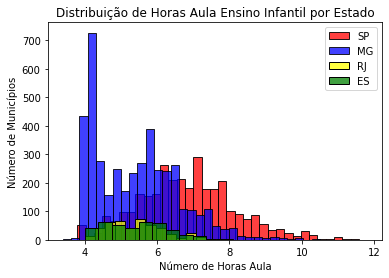

In [ ]:
#sns.histplot(ha_t['HAD_INF'],color="green")
sns.histplot(ha_t_SP['HAD_INF'],color="red")
sns.histplot(ha_t_MG['HAD_INF'],color="blue")
sns.histplot(ha_t_RJ['HAD_INF'],color="yellow")
sns.histplot(ha_t_ES['HAD_INF'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Horas Aula Ensino Infantil por Estado")
plt.xlabel("Número de Horas Aula")
plt.ylabel("Número de Municípios")
plt.show()

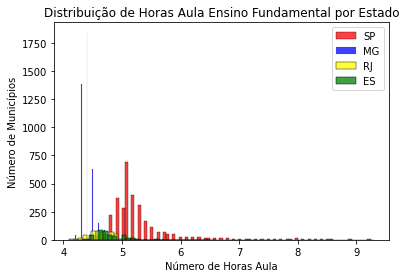

In [ ]:
#sns.histplot(ha_t['HAD_FUN'],color="green")
sns.histplot(ha_t_SP['HAD_FUN'],color="red")
sns.histplot(ha_t_MG['HAD_FUN'],color="blue")
sns.histplot(ha_t_RJ['HAD_FUN'],color="yellow")
sns.histplot(ha_t_ES['HAD_FUN'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Horas Aula Ensino Fundamental por Estado")
plt.xlabel("Número de Horas Aula")
plt.ylabel("Número de Municípios")
plt.show()

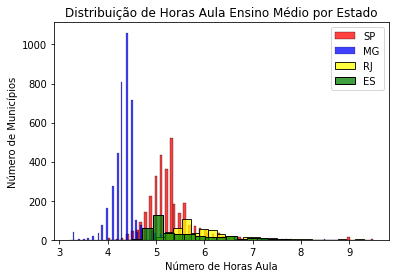

In [ ]:
#sns.histplot(ha_t['HAD_MED'],color="green")
sns.histplot(ha_t_SP['HAD_MED'],color="red")
sns.histplot(ha_t_MG['HAD_MED'],color="blue")
sns.histplot(ha_t_RJ['HAD_MED'],color="yellow")
sns.histplot(ha_t_ES['HAD_MED'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Horas Aula Ensino Médio por Estado")
plt.xlabel("Número de Horas Aula")
plt.ylabel("Número de Municípios")
plt.show()

## Plotando Boxplots para avaliar a variação de horas aula por estado e por ano escolar ao longo dos últimos 5 anos (2016-2020)

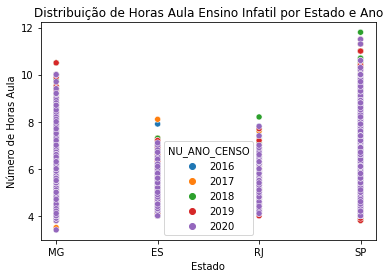

In [ ]:
sns.scatterplot(data = ha_t, x = "SG_UF", y = "HAD_INF", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Horas Aula Ensino Infatil por Estado e Ano")
plt.ylabel("Número de Horas Aula")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

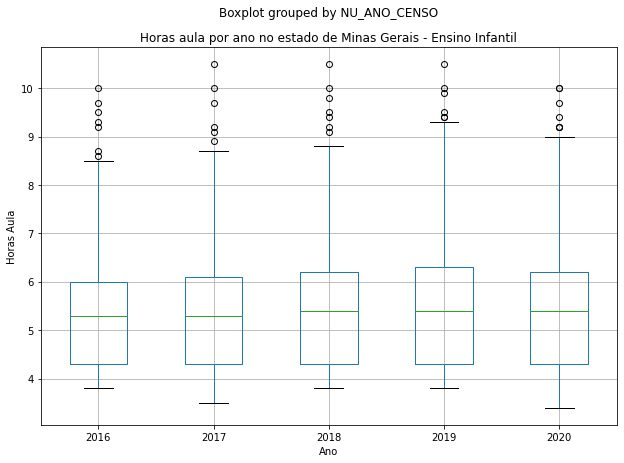

In [ ]:
graph = ha_t_MG.boxplot(column=['HAD_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado de Minas Gerais - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

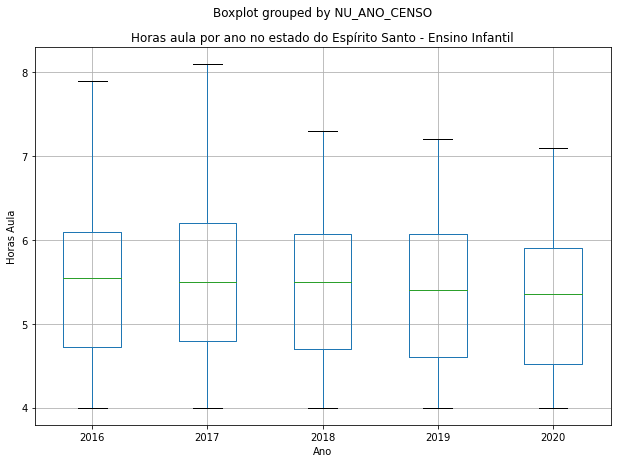

In [ ]:
graph = ha_t_ES.boxplot(column=['HAD_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado do Espírito Santo - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

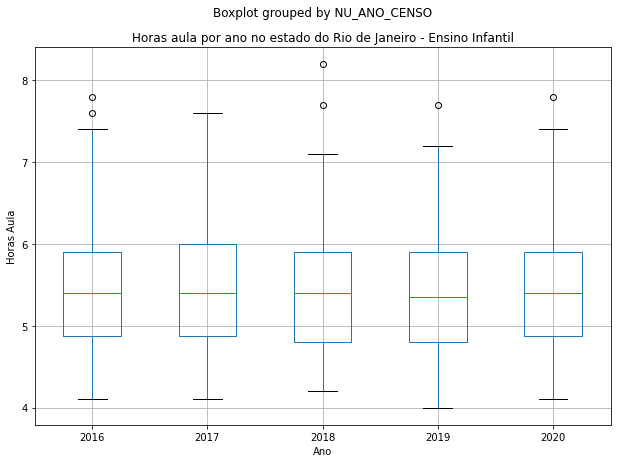

In [ ]:
graph = ha_t_RJ.boxplot(column=['HAD_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado do Rio de Janeiro - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

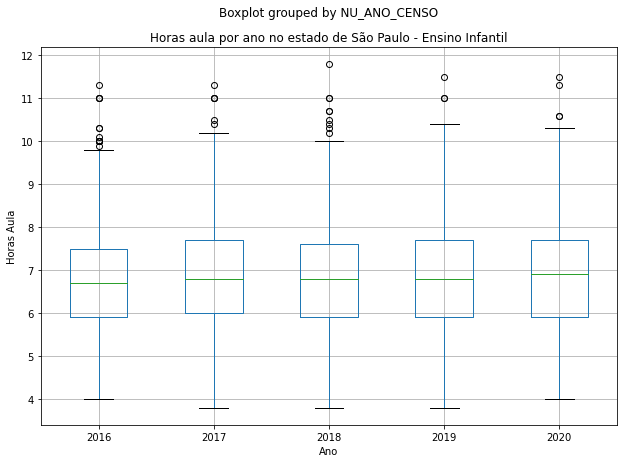

In [ ]:
graph = ha_t_SP.boxplot(column=['HAD_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado de São Paulo - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

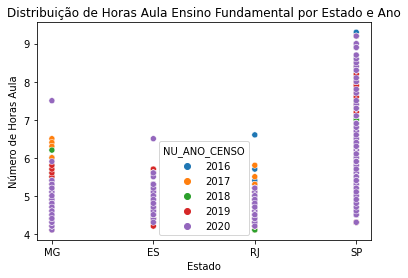

In [ ]:
sns.scatterplot(data = ha_t, x = "SG_UF", y = "HAD_FUN", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Horas Aula Ensino Fundamental por Estado e Ano")
plt.ylabel("Número de Horas Aula")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

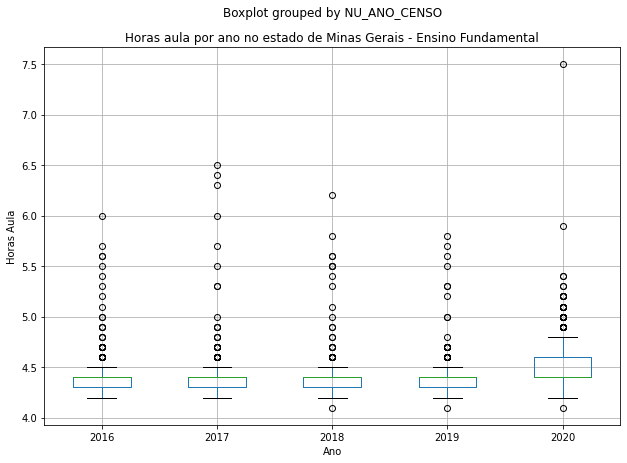

In [ ]:
graph = ha_t_MG.boxplot(column=['HAD_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado de Minas Gerais - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

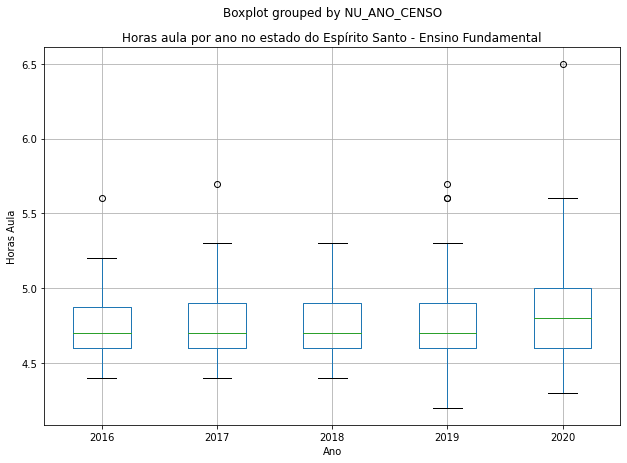

In [ ]:
graph = ha_t_ES.boxplot(column=['HAD_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado do Espírito Santo - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

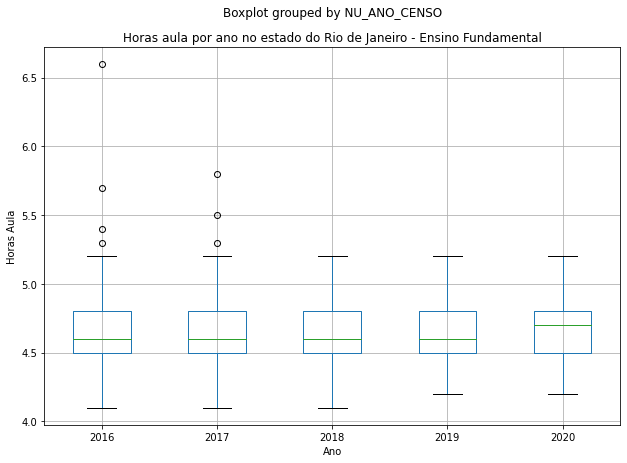

In [ ]:
graph = ha_t_RJ.boxplot(column=['HAD_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado do Rio de Janeiro - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

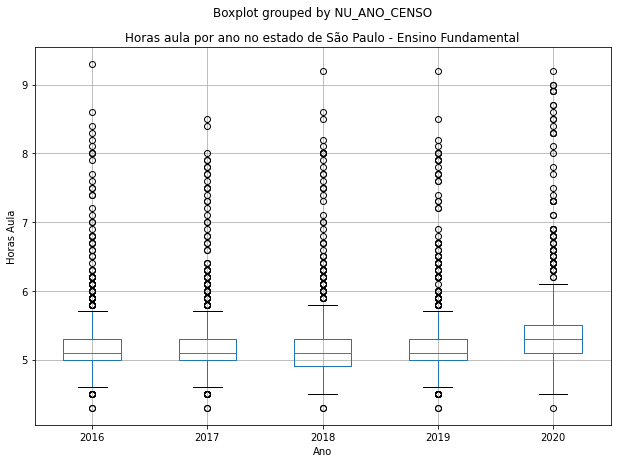

In [ ]:
graph = ha_t_SP.boxplot(column=['HAD_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado de São Paulo - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

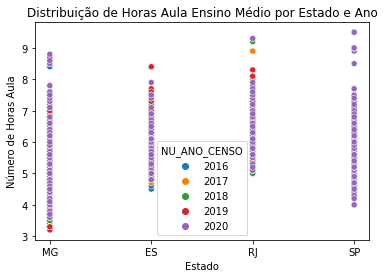

In [ ]:
sns.scatterplot(data = ha_t, x = "SG_UF", y = "HAD_MED", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Horas Aula Ensino Médio por Estado e Ano")
plt.ylabel("Número de Horas Aula")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

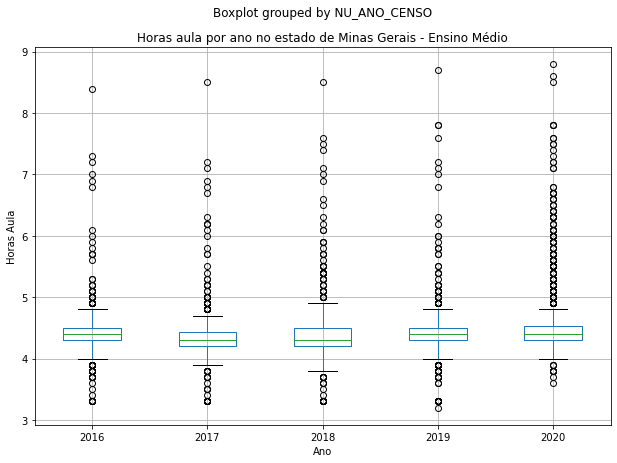

In [ ]:
graph = ha_t_MG.boxplot(column=['HAD_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado de Minas Gerais - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

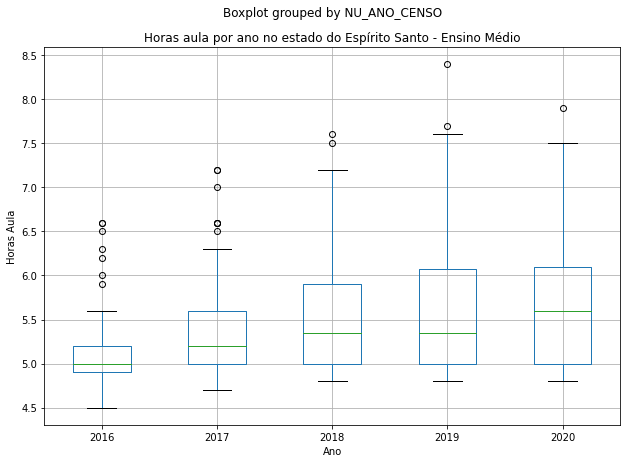

In [ ]:
graph = ha_t_ES.boxplot(column=['HAD_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado do Espírito Santo - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

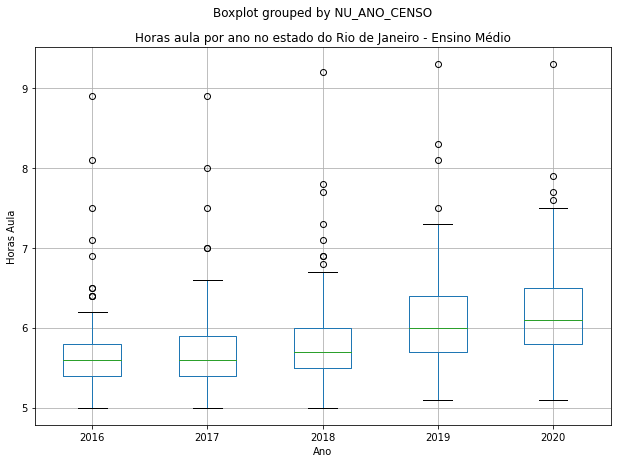

In [ ]:
graph = ha_t_RJ.boxplot(column=['HAD_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado do Rio de Janeiro - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

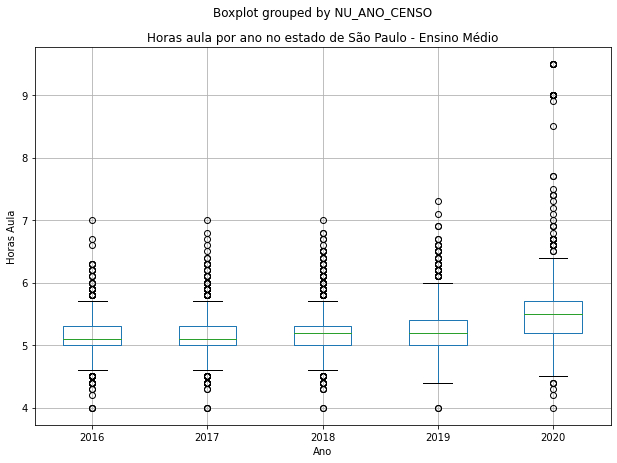

In [ ]:
graph = ha_t_SP.boxplot(column=['HAD_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano no estado de São Paulo - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

## Plotando Boxplots para avaliar variação de horas aula por ano escolar em toda a região sudeste nos últimos 5 anos (2016-2020)

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

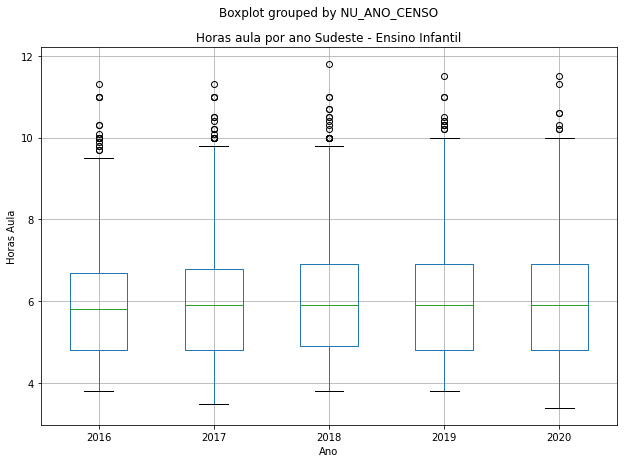

In [ ]:
graph = ha_t.boxplot(column=['HAD_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano Sudeste - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

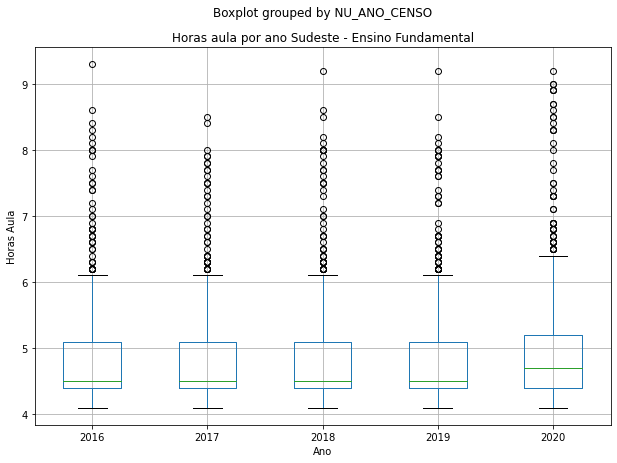

In [ ]:
graph = ha_t.boxplot(column=['HAD_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano Sudeste - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

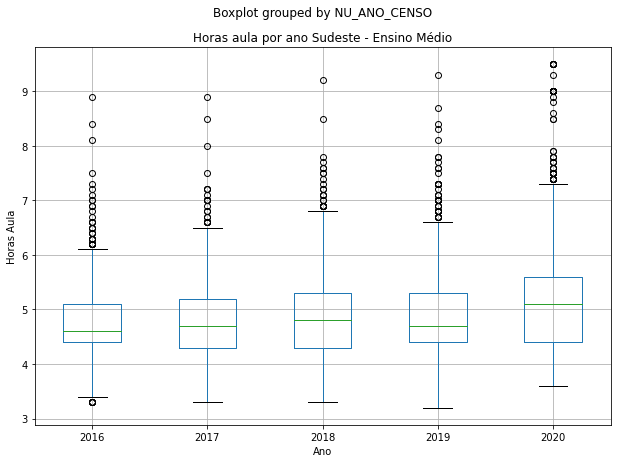

In [ ]:
graph = ha_t.boxplot(column=['HAD_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Horas aula por ano Sudeste - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Horas Aula")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

### **Teste de Hipótese**

<h5>Hipótese Nula H0:</h5> Média Horas Aula(2016-2019) = Média Horas Aula(2020)

<h5>Hipótese Alternativa H1:</h5> Média(2020) > Média(2016-2019) 

<h5>OU SEJA:</h5> A hipótese alternativa fala que Média(2016-2019) - Média(2020) > 0

<h3>TESTE UNILATERAL PELA DIREITA:</h3> 

REGIAO CRITICA: DIFERENÇA > 0 (LADO DIREITO)

VAMOS REJEITAR A HIPOTESE NULA SE A PROBABILIDADE DE ENCONTRAR UMA DIFERENÇA ENTRE AS MÉDIAS,CONFORME OBSERVADO NOS DADOS, SE SITUAR DENTRO DA REGIÃO CRITICA. SE CONSIDERARMOS UM NÍVEL DE SIGNIFICANCIA DE 5%, VAMOS REJEITAR A HIPOTESE NULA SE Z-SCORE > 1.96 OU SE P-VALUE < 0.05.

**Ensino Infantil**

In [ ]:
print("2020")
mean_2020,std_error_2020=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_INF'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2019]['HAD_INF'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2018]['HAD_INF'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2017]['HAD_INF'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2016]['HAD_INF'])

2020
Erro padrao 0.035 
Intervalo de confiança: [5.949 - 6.086] 

2019
Erro padrao 0.035 
Intervalo de confiança: [5.936 - 6.072] 

2018
Erro padrao 0.034 
Intervalo de confiança: [5.907 - 6.040] 

2017
Erro padrao 0.034 
Intervalo de confiança: [5.890 - 6.022] 

2016
Erro padrao 0.033 
Intervalo de confiança: [5.824 - 5.953] 


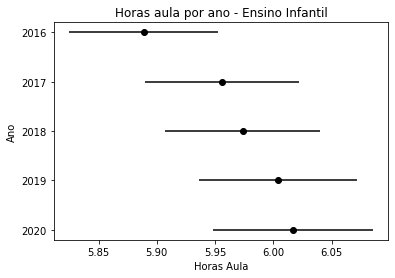

In [ ]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Horas aula por ano - Ensino Infantil")
plt.xlabel("Horas Aula")
plt.ylabel("Ano")
plt.show()

In [ ]:
std_error_diff = str_error_diff_mean(ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_INF'], ha_t[ha_t['NU_ANO_CENSO']!=2020]['HAD_INF'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: 0.062 
Erro Padrão das Diferenças: 0.039 
As diferenças de médias está 1.584 vezes o erro padrão da média 


> **Nesse caso não é possível rejeitar H0, pois a diferença das médias está em um valor menor que 1.96, logo dizemos que não houve alteração significativa no número de horas aula entre os anos de 2016 a 2019 e 2020 para o Ensino Infantil.**





In [ ]:
analise_amostra(ha_t['HAD_INF'], ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_INF'])

Média População: 5.968
Média Amostra:  6.01714628297361
Erro Padrão:0.03400444021102731
A diferença entre a média da amostra e da população é de 1.447 erros padrões.
Valor-p: 0.1478622668
Existe uma probabilidade razoável de a amostra ter sido tirada da população







> **Além disso, podemos observar que entre os anos de 2016 e 2020 a mudança no número de horas aula do Ensino Infantil não foi muito significativa.**



**Ensino Fundamental**

In [ ]:
print("2020")
mean_2020,std_error_2020=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_FUN'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2019]['HAD_FUN'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2018]['HAD_FUN'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2017]['HAD_FUN'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2016]['HAD_FUN'])

2020
Erro padrao 0.016 
Intervalo de confiança: [4.852 - 4.915] 

2019
Erro padrao 0.014 
Intervalo de confiança: [4.743 - 4.799] 

2018
Erro padrao 0.014 
Intervalo de confiança: [4.735 - 4.791] 

2017
Erro padrao 0.014 
Intervalo de confiança: [4.733 - 4.786] 

2016
Erro padrao 0.014 
Intervalo de confiança: [4.737 - 4.791] 


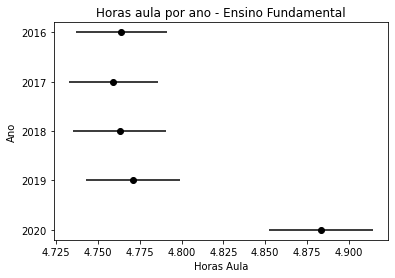

In [ ]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Horas aula por ano - Ensino Fundamental")
plt.xlabel("Horas Aula")
plt.ylabel("Ano")
plt.show()

In [ ]:
std_error_diff=str_error_diff_mean(ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_FUN'],ha_t[ha_t['NU_ANO_CENSO']!=2020]['HAD_FUN'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: 0.119 
Erro Padrão das Diferenças: 0.017 
As diferenças de médias está 6.843 vezes o erro padrão da média 


> **Nesse caso é possível rejeitar H0, pois a diferença das médias está em um valor maior que 1.96, logo dizemos que houve alteração significativa no número de horas aula entre os anos de 2016 a 2019 e 2020 para o Ensino Fundamental. Além disso, é possível perceber que essa diferença se refere à um aumento em relação ao período de 2016 a 2019.**





In [ ]:
analise_amostra(ha_t['HAD_FUN'], ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_FUN'])

Média População: 4.788
Média Amostra:  4.883333333333334
Erro Padrão:0.0144586031124001
A diferença entre a média da amostra e da população é de 6.587 erros padrões.
Valor-p: 0.0000000000
É improvável que a amostra tenha sido tirada da população







> **Além disso, podemos observar que entre os anos de 2016 e 2020 a mudança no número de horas aula do Ensino Fundamental foi muito significativa. Ou seja, 2020 realmente foram ofertadas mais horas-aula se considerado os anos de 2016 a 2020**



**Ensino Médio**

In [ ]:
print("2020")
mean_2020,std_error_2020=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_MED'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2019]['HAD_MED'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2018]['HAD_MED'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2017]['HAD_MED'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(ha_t[ha_t['NU_ANO_CENSO']==2016]['HAD_MED'])

2020
Erro padrao 0.023 
Intervalo de confiança: [5.120 - 5.208] 

2019
Erro padrao 0.018 
Intervalo de confiança: [4.855 - 4.925] 

2018
Erro padrao 0.017 
Intervalo de confiança: [4.817 - 4.883] 

2017
Erro padrao 0.015 
Intervalo de confiança: [4.769 - 4.830] 

2016
Erro padrao 0.014 
Intervalo de confiança: [4.759 - 4.814] 


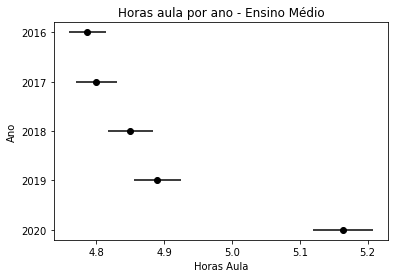

In [ ]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Horas aula por ano - Ensino Médio")
plt.xlabel("Horas Aula")
plt.ylabel("Ano")
plt.show()

In [ ]:
std_error_diff=str_error_diff_mean(ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_MED'],ha_t[ha_t['NU_ANO_CENSO']!=2020]['HAD_MED'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: 0.332 
Erro Padrão das Diferenças: 0.024 
As diferenças de médias está 13.906 vezes o erro padrão da média 


> **Nesse caso é possível rejeitar H0, pois a diferença das médias está em um valor maior que 1.96, logo dizemos que houve alteração significativa no número de horas aula entre os anos de 2016 a 2019 e 2020 para o Ensino Médio. Além disso, é possível perceber que essa diferença se refere à um aumento em relação ao período de 2016 a 2019. Essa diferença foi mais significativa que a diferença no Ensino Fundamental.**





In [ ]:
analise_amostra(ha_t['HAD_MED'], ha_t[ha_t['NU_ANO_CENSO']==2020]['HAD_MED'])

Média População: 4.898
Média Amostra:  5.164007198560315
Erro Padrão:0.01785352810644377
A diferença entre a média da amostra e da população é de 14.897 erros padrões.
Valor-p: 0.0000000000
É improvável que a amostra tenha sido tirada da população







> **Além disso, podemos observar que entre os anos de 2016 e 2020 a mudança no número de horas aula do Ensino Médio foi muito significativa. Ou seja, 2020 realmente foram ofertadas mais horas-aula se considerado os anos de 2016 a 2020**



# Avaliando a variação do número de ALUNOS POR TURMA
**Objetivo**: Responder à pergunta "Qual foi a mudança nos últimos 5 anos da relação número de alunos por turma? O que pode explicar essa mudança?"

In [ ]:
# Buscando apenas valores necessários (Totais) para responder a pergunta
at_t = at[at['Dependad']=='Total']
at_t = at_t[at_t['TIPOLOCA']=='Total']
at_t = at_t.reset_index()
at_t = at_t[['NU_ANO_CENSO','SG_UF', 'NO_MUNICIPIO', 'ATU_INF', 'ATU_FUN', 'ATU_MED']]
at_t

,NU_ANO_CENSO,SG_UF,NO_MUNICIPIO,ATU_INF,ATU_FUN,ATU_MED
0,2016,MG,Abadia dos Dourados,12.200000000000001,18.5,32.0
1,2016,MG,Abaeté,17.900000000000002,21.5,32.5
2,2016,MG,Abre Campo,11.8,17.5,30.1
3,2016,MG,Acaiaca,12.700000000000001,20.0,25.6
4,2016,MG,Açucena,10.200000000000001,14.200000000000001,27.8
...,...,...,...,...,...,...
8335,2020,SP,Votorantim,20.6,26.4,30.9
8336,2020,SP,Votuporanga,19.5,25.4,34
8337,2020,SP,Zacarias,11.3,22.6,21
8338,2020,SP,Chavantes,16,22.9,30.8


In [ ]:
# Convertendo valores para seus respectivos tipos
at_t['NU_ANO_CENSO'] = at_t['NU_ANO_CENSO'].astype('int')
at_t['SG_UF'] = at_t['SG_UF'].astype('str')
at_t['NO_MUNICIPIO'] = at_t['NO_MUNICIPIO'].astype('str')
at_t['ATU_INF'] = at_t['ATU_INF'].astype('float')
at_t['ATU_FUN'] = at_t['ATU_FUN'].astype('float')
at_t['ATU_MED'] = at_t['ATU_MED'].astype('float')
at_t.dtypes

0
NU_ANO_CENSO      int64
SG_UF            object
NO_MUNICIPIO     object
ATU_INF         float64
ATU_FUN         float64
ATU_MED         float64
dtype: object

In [ ]:
# Separando dados por estados
at_t_MG = at_t[at_t['SG_UF']=='MG']
at_t_ES = at_t[at_t['SG_UF']=='ES']
at_t_RJ = at_t[at_t['SG_UF']=='RJ']
at_t_SP = at_t[at_t['SG_UF']=='SP']

## Observações estatísticas gerais

### Observações Ensino Infantil

In [ ]:
at_t['ATU_INF'].describe()

count    8340.000000
mean       15.910851
std         2.800571
min         5.200000
25%        14.200000
50%        15.900000
75%        17.500000
max        33.600000
Name: ATU_INF, dtype: float64

In [ ]:
confidence_interval(at_t['ATU_INF'])

Erro padrao 0.031 
Intervalo de confiança: [15.851 - 15.971] 


(15.910851318944925, 0.06010625020884195)

### Observações Ensino Fundamental

In [ ]:
at_t['ATU_FUN'].describe()

count    8340.000000
mean       21.467758
std         3.118172
min         7.700000
25%        19.500000
50%        21.700000
75%        23.700000
max        32.200000
Name: ATU_FUN, dtype: float64

In [ ]:
confidence_interval(at_t['ATU_FUN'])

Erro padrao 0.034 
Intervalo de confiança: [21.401 - 21.535] 


(21.467757793764957, 0.06692264386803144)

### Observações Ensino Médio

In [ ]:
at_t['ATU_MED'].describe()

count    8335.000000
mean       28.108206
std         4.915152
min         7.700000
25%        25.100000
50%        28.800000
75%        31.700000
max        43.100000
Name: ATU_MED, dtype: float64

In [ ]:
confidence_interval(at_t['ATU_MED'])

Erro padrao 0.054 
Intervalo de confiança: [28.003 - 28.214] 


(28.108206358728097, 0.10548968399059595)

## Plotando distribuição geral dos valores para observar a distribuição do número de horas aula por estado e por ano escolar

Subdividido por estado e por Ano Escolar (Infantil, Fundamental e Médio)



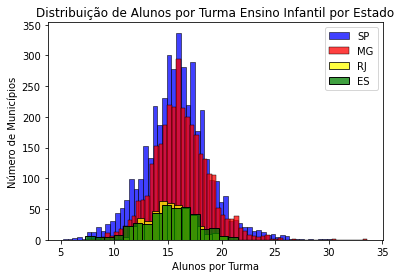

In [ ]:
sns.histplot(at_t_MG['ATU_INF'],color="blue")
sns.histplot(at_t_SP['ATU_INF'],color="red")
sns.histplot(at_t_RJ['ATU_INF'],color="yellow")
sns.histplot(at_t_ES['ATU_INF'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Alunos por Turma Ensino Infantil por Estado")
plt.xlabel("Alunos por Turma")
plt.ylabel("Número de Municípios")
plt.show()

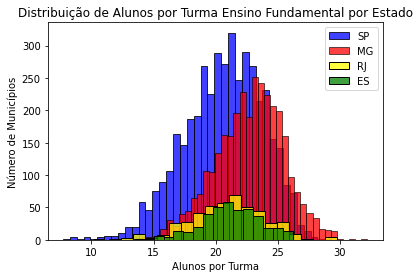

In [ ]:
sns.histplot(at_t_MG['ATU_FUN'],color="blue")
sns.histplot(at_t_SP['ATU_FUN'],color="red")
sns.histplot(at_t_RJ['ATU_FUN'],color="yellow")
sns.histplot(at_t_ES['ATU_FUN'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Alunos por Turma Ensino Fundamental por Estado")
plt.xlabel("Alunos por Turma")
plt.ylabel("Número de Municípios")
plt.show()

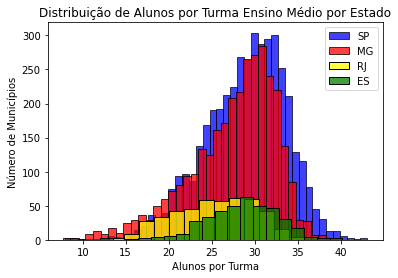

In [ ]:
sns.histplot(at_t_MG['ATU_MED'],color="blue")
sns.histplot(at_t_SP['ATU_MED'],color="red")
sns.histplot(at_t_RJ['ATU_MED'],color="yellow")
sns.histplot(at_t_ES['ATU_MED'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Alunos por Turma Ensino Médio por Estado")
plt.xlabel("Alunos por Turma")
plt.ylabel("Número de Municípios")
plt.show()

## Plotando Boxplots para avaliar a variação de horas aula por estado e por ano escolar ao longo dos últimos 5 anos (2016-2020)

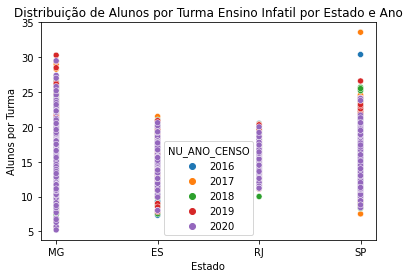

In [ ]:
sns.scatterplot(data = at_t, x = "SG_UF", y = "ATU_INF", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Alunos por Turma Ensino Infatil por Estado e Ano")
plt.ylabel("Alunos por Turma")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

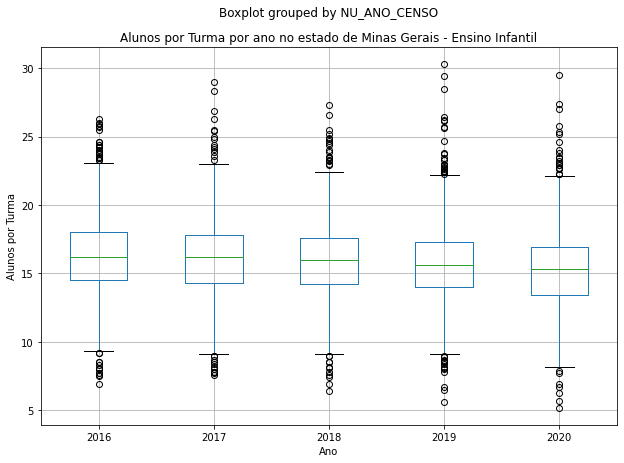

In [ ]:
graph = at_t_MG.boxplot(column=['ATU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado de Minas Gerais - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

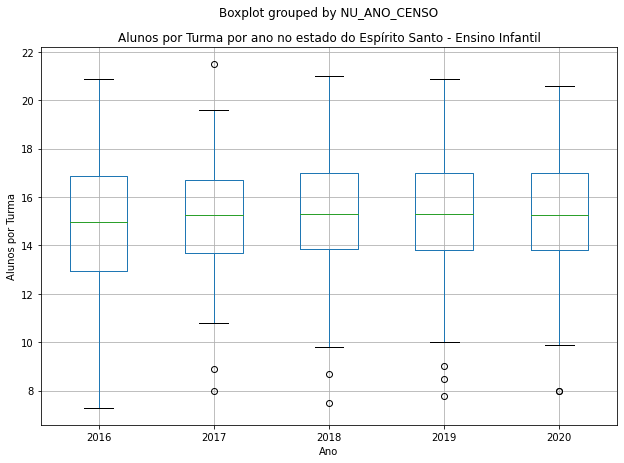

In [ ]:
graph = at_t_ES.boxplot(column=['ATU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado do Espírito Santo - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

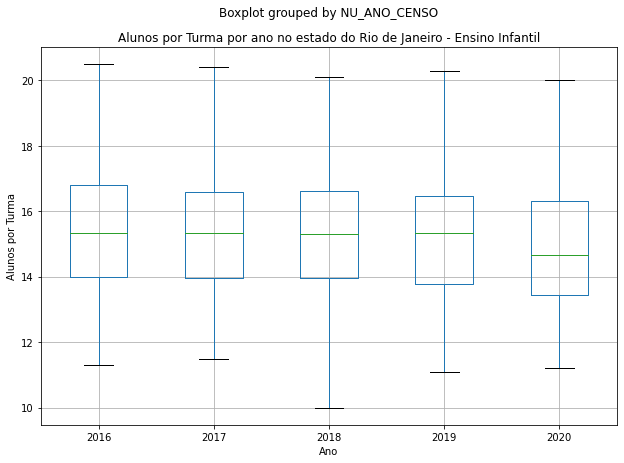

In [ ]:
graph = at_t_RJ.boxplot(column=['ATU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado do Rio de Janeiro - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

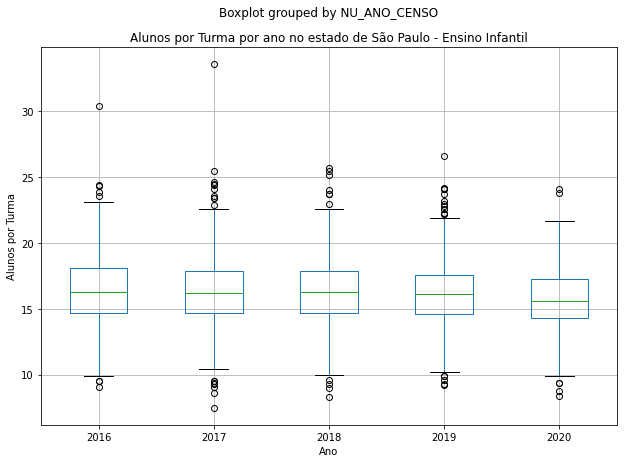

In [ ]:
graph = at_t_SP.boxplot(column=['ATU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado de São Paulo - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

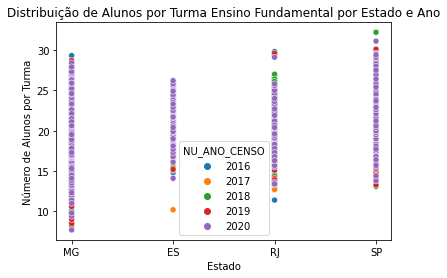

In [ ]:
sns.scatterplot(data = at_t, x = "SG_UF", y = "ATU_FUN", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Alunos por Turma Ensino Fundamental por Estado e Ano")
plt.ylabel("Número de Alunos por Turma")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

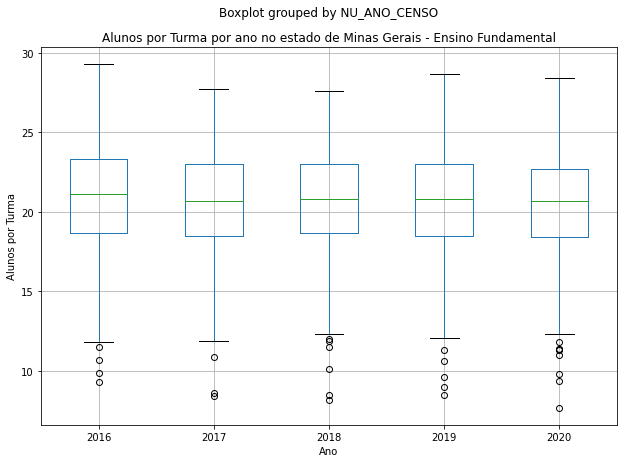

In [ ]:
graph = at_t_MG.boxplot(column=['ATU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado de Minas Gerais - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

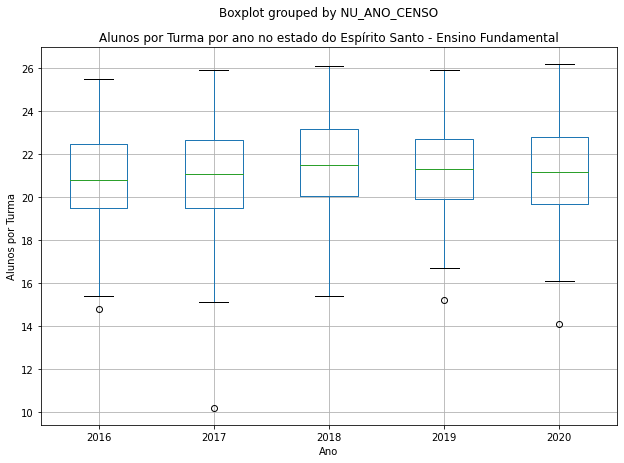

In [ ]:
graph = at_t_ES.boxplot(column=['ATU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado do Espírito Santo - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

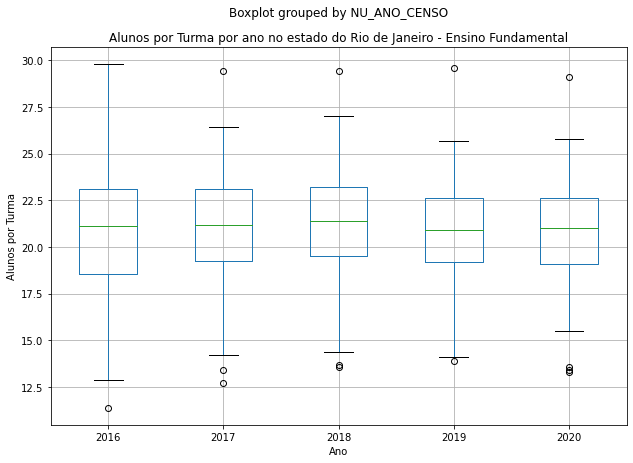

In [ ]:
graph = at_t_RJ.boxplot(column=['ATU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado do Rio de Janeiro - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

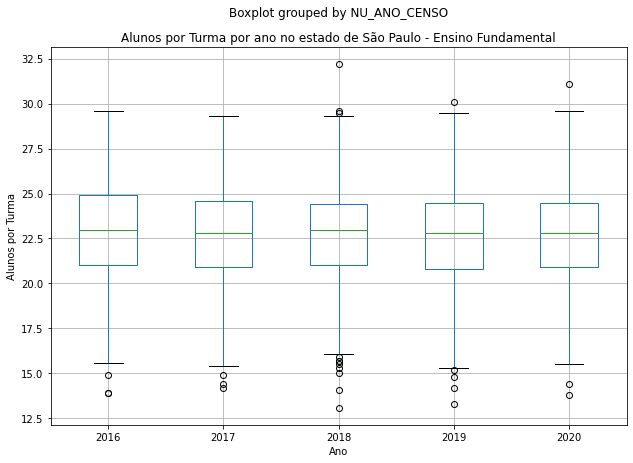

In [ ]:
graph = at_t_SP.boxplot(column=['ATU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado de São Paulo - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

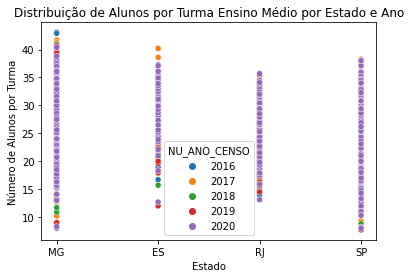

In [ ]:
sns.scatterplot(data = at_t, x = "SG_UF", y = "ATU_MED", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Alunos por Turma Ensino Médio por Estado e Ano")
plt.ylabel("Número de Alunos por Turma")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

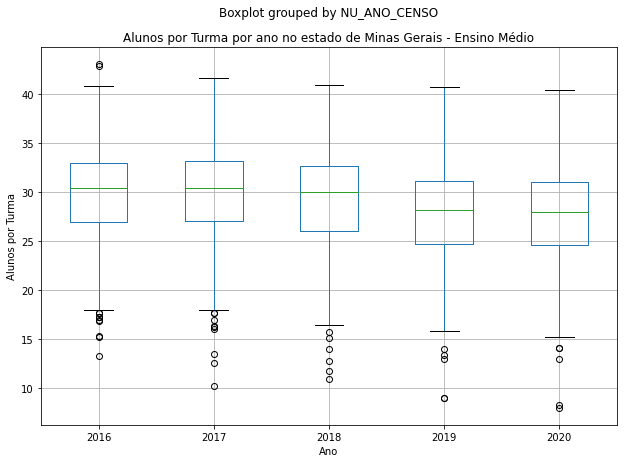

In [ ]:
graph = at_t_MG.boxplot(column=['ATU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado de Minas Gerais - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

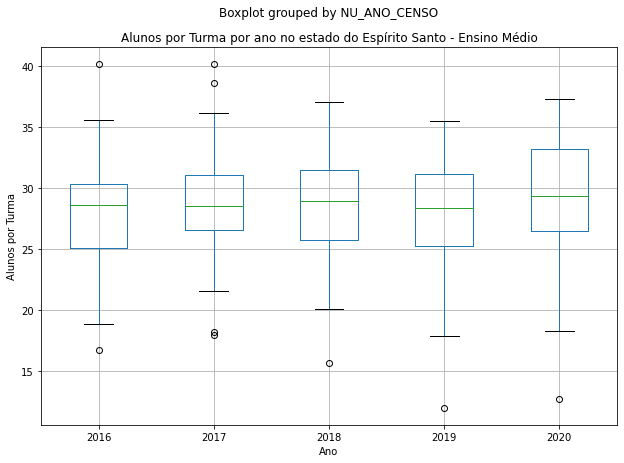

In [ ]:
graph = at_t_ES.boxplot(column=['ATU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado do Espírito Santo - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

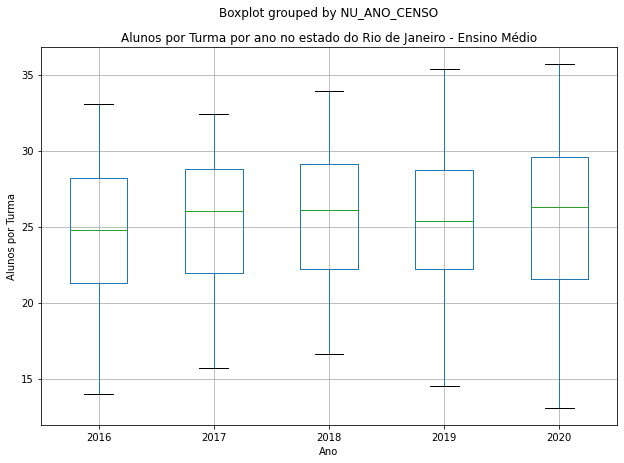

In [ ]:
graph = at_t_RJ.boxplot(column=['ATU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado do Rio de Janeiro - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

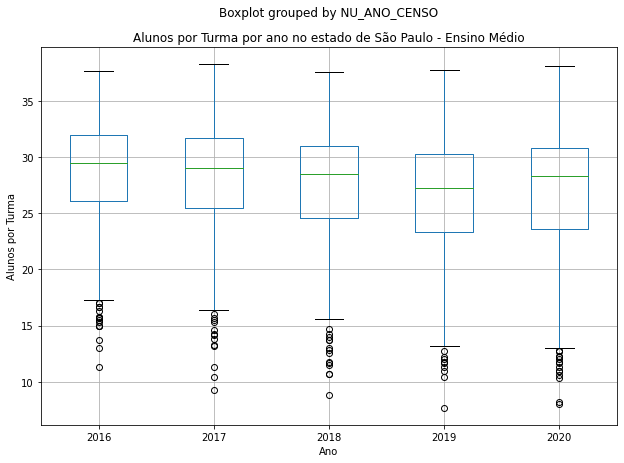

In [ ]:
graph = at_t_SP.boxplot(column=['ATU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano no estado de São Paulo - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

## Plotando Boxplots para avaliar variação de horas aula por ano escolar em toda a região sudeste nos últimos 5 anos (2016-2020)

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

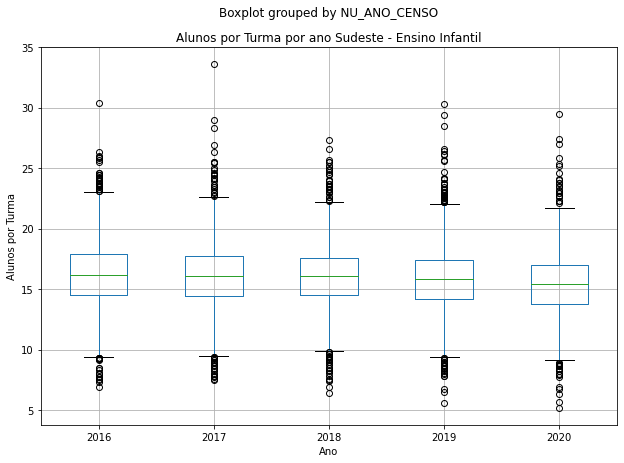

In [ ]:
graph = at_t.boxplot(column=['ATU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano Sudeste - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

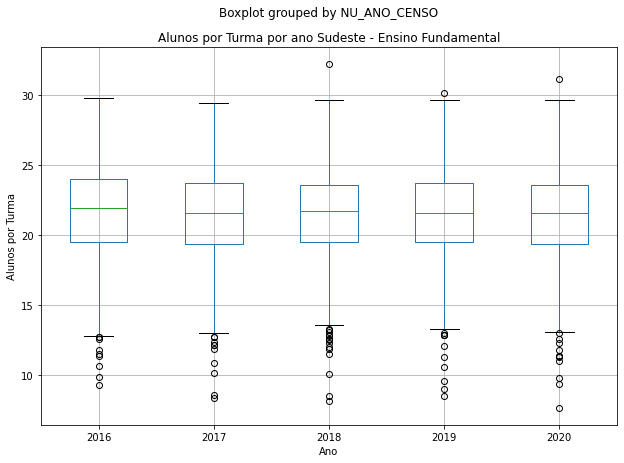

In [ ]:
graph = at_t.boxplot(column=['ATU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano Sudeste - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

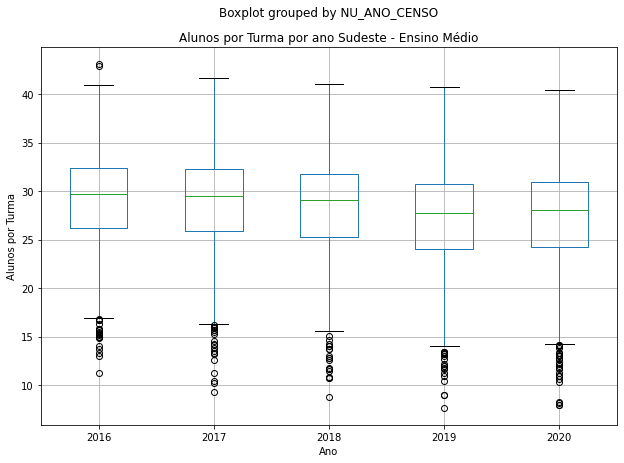

In [ ]:
graph = at_t.boxplot(column=['ATU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Turma por ano Sudeste - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Alunos por Turma")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

### **Teste de Hipótese**

<h5>Hipótese Nula H0:</h5> Média Alunos por Turma(2016-2019) = Média Alunos por Turma(2020)

<h5>Hipótese Alternativa H1:</h5> Média(2020) > Média(2016-2019) 

<h5>OU SEJA:</h5> A hipótese alternativa fala que Média(2016-2019) - Média(2020) > 0

<h3>TESTE UNILATERAL PELA DIREITA:</h3> 

REGIAO CRITICA: DIFERENÇA > 0 (LADO DIREITO)

VAMOS REJEITAR A HIPOTESE NULA SE A PROBABILIDADE DE ENCONTRAR UMA DIFERENÇA ENTRE AS MÉDIAS,CONFORME OBSERVADO NOS DADOS, SE SITUAR DENTRO DA REGIÃO CRITICA. SE CONSIDERARMOS UM NÍVEL DE SIGNIFICANCIA DE 5%, VAMOS REJEITAR A HIPOTESE NULA SE Z-SCORE > 1.96 OU SE P-VALUE < 0.05.

**Ensino Infantil**

In [ ]:
print("2020")
mean_2020,std_error_2020=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2020]['ATU_INF'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2019]['ATU_INF'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2018]['ATU_INF'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2017]['ATU_INF'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2016]['ATU_INF'])

2020
Erro padrao 0.067 
Intervalo de confiança: [15.269 - 15.530] 

2019
Erro padrao 0.069 
Intervalo de confiança: [15.682 - 15.951] 

2018
Erro padrao 0.067 
Intervalo de confiança: [15.889 - 16.153] 

2017
Erro padrao 0.069 
Intervalo de confiança: [15.960 - 16.229] 

2016
Erro padrao 0.069 
Intervalo de confiança: [16.087 - 16.359] 


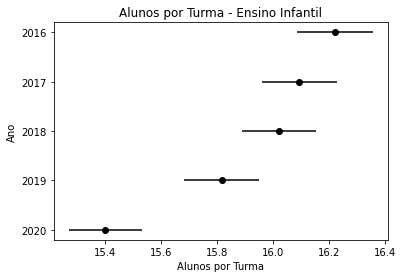

In [ ]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Alunos por Turma - Ensino Infantil")
plt.xlabel("Alunos por Turma")
plt.ylabel("Ano")
plt.show()

In [ ]:
std_error_diff=str_error_diff_mean(at_t[at_t['NU_ANO_CENSO']==2020]['ATU_INF'],at_t[at_t['NU_ANO_CENSO']!=2020]['ATU_INF'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: -0.639 
Erro Padrão das Diferenças: 0.075 
As diferenças de médias está -8.515 vezes o erro padrão da média 


> **Nesse caso é possível rejeitar H0, pois a diferença das médias está em um valor menor que -1.96, logo dizemos que houve alteração significativa no número de alunos por turma entre os anos de 2019 e 2020 para o Ensino Infantil. No caso, houve uma queda significativa.**





In [ ]:
analise_amostra(at_t['ATU_INF'], at_t[at_t['NU_ANO_CENSO']==2020]['ATU_INF'])

Média População: 15.911
Média Amostra:  15.399460431654683
Erro Padrão:0.06857227619366404
A diferença entre a média da amostra e da população é de 7.458 erros padrões.
Valor-p: 0.0000000000
É improvável que a amostra tenha sido tirada da população







> **Além disso, podemos observar que entre os anos de 2016 e 2020 a mudança no número de horas aula do Ensino Infantil foi significativa, apontando para uma queda no número de alunos no ano de 2020 em relação ao geral (2016-2020).**



**Ensino Fundamental**

In [ ]:
print("2020")
mean_2020,std_error_2020=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2020]['ATU_FUN'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2019]['ATU_FUN'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2018]['ATU_FUN'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2017]['ATU_FUN'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2016]['ATU_FUN'])

2020
Erro padrao 0.077 
Intervalo de confiança: [21.204 - 21.507] 

2019
Erro padrao 0.076 
Intervalo de confiança: [21.318 - 21.614] 

2018
Erro padrao 0.076 
Intervalo de confiança: [21.333 - 21.630] 

2017
Erro padrao 0.076 
Intervalo de confiança: [21.266 - 21.564] 

2016
Erro padrao 0.077 
Intervalo de confiança: [21.469 - 21.772] 


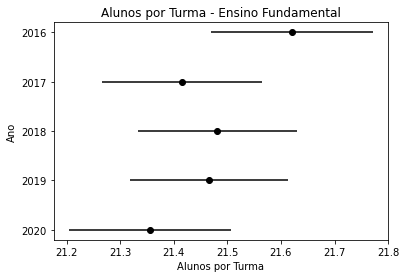

In [ ]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Alunos por Turma - Ensino Fundamental")
plt.xlabel("Alunos por Turma")
plt.ylabel("Ano")
plt.show()

In [ ]:
std_error_diff=str_error_diff_mean(at_t[at_t['NU_ANO_CENSO']==2020]['ATU_FUN'],at_t[at_t['NU_ANO_CENSO']!=2020]['ATU_FUN'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: -0.140 
Erro Padrão das Diferenças: 0.086 
As diferenças de médias está -1.632 vezes o erro padrão da média 


> **Nesse caso não é possível rejeitar H0, pois a diferença das médias está em um valor entre -1.96 e 1.96, logo dizemos que não houve alteração significativa no número de alunos por turma entre os anos de 2019 e 2020 para o Ensino Fundamental.**





In [ ]:
analise_amostra(at_t['ATU_FUN'], at_t[at_t['NU_ANO_CENSO']==2020]['ATU_FUN'])

Média População: 21.468
Média Amostra:  21.35545563549163
Erro Padrão:0.07634876577700396
A diferença entre a média da amostra e da população é de 1.471 erros padrões.
Valor-p: 0.1413154749
Existe uma probabilidade razoável de a amostra ter sido tirada da população







> **Além disso, podemos observar que entre os anos de 2016 e 2020 a mudança no número de horas aula do Ensino Fundamental não foi muito significativa, apontando para uma certa estabilidade, com chance de um pequeno aumento.**



**Ensino Médio**

In [ ]:
print("2020")
mean_2020,std_error_2020=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2020]['ATU_MED'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2019]['ATU_MED'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2018]['ATU_MED'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2017]['ATU_MED'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(at_t[at_t['NU_ANO_CENSO']==2016]['ATU_MED'])

2020
Erro padrao 0.124 
Intervalo de confiança: [27.043 - 27.528] 

2019
Erro padrao 0.120 
Intervalo de confiança: [26.841 - 27.310] 

2018
Erro padrao 0.119 
Intervalo de confiança: [28.081 - 28.548] 

2017
Erro padrao 0.117 
Intervalo de confiança: [28.649 - 29.107] 

2016
Erro padrao 0.115 
Intervalo de confiança: [28.763 - 29.212] 


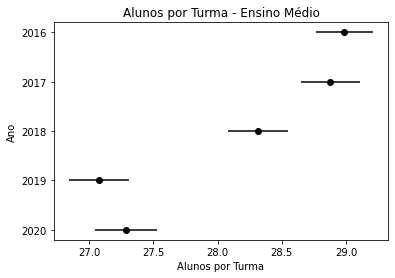

In [ ]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Alunos por Turma - Ensino Médio")
plt.xlabel("Alunos por Turma")
plt.ylabel("Ano")
plt.show()

In [ ]:
std_error_diff=str_error_diff_mean(at_t[at_t['NU_ANO_CENSO']==2020]['ATU_MED'],at_t[at_t['NU_ANO_CENSO']!=2020]['ATU_MED'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: -1.028 
Erro Padrão das Diferenças: 0.137 
As diferenças de médias está -7.492 vezes o erro padrão da média 


> **Nesse caso é possível rejeitar H0, pois a diferença das médias está em um valor abaixo de -1.96, logo dizemos que houve alteração significativa no número de alunos por turma entre os anos de 2016-2019 e 2020 para o Ensino Médio, apesar de ser possível observar que essa queda ocorreu mais significativamente em 2019.**





In [ ]:
analise_amostra(at_t['ATU_MED'], at_t[at_t['NU_ANO_CENSO']==2020]['ATU_MED'])

Média População: 28.108
Média Amostra:  27.285602879424157
Erro Padrão:0.12034801241221625
A diferença entre a média da amostra e da população é de 6.835 erros padrões.
Valor-p: 0.0000000000
É improvável que a amostra tenha sido tirada da população







> **Podemos observar que entre os anos de 2016 e 2020 a mudança no número de horas aula do Ensino Médio foi muito significativa, apontando para uma diminuição do número de alunos por turma.**



# Avaliando a variação do número de DOCENTES COM NÍVEL SUPERIOR
**Objetivo**: Responder à pergunta "Nos últimos 5 anos, qual foi a variação no percentual de docentes com nível superior?"

In [ ]:
# Buscando apenas valores necessários (Totais) para responder a pergunta
ds_t = ds[ds['Dependad']=='Total']
ds_t = ds_t[ds_t['TIPOLOCA']=='Total']
ds_t = ds_t.reset_index()
ds_t = ds_t[['NU_ANO_CENSO','SG_UF', 'NO_MUNICIPIO', 'DSU_INF', 'DSU_FUN', 'DSU_MED']]
ds_t

,NU_ANO_CENSO,SG_UF,NO_MUNICIPIO,DSU_INF,DSU_FUN,DSU_MED
0,2016,MG,3100104,78.60000000000001,91.4,100.0
1,2016,MG,3100203,88.10000000000001,98.2,98.10000000000001
2,2016,MG,3100302,66.7,89.4,97.5
3,2016,MG,3100401,92.9,98.0,80.0
4,2016,MG,3100500,81.8,86.0,81.3
...,...,...,...,...,...,...
8335,2020,SP,3557006,94.1,98,96.5
8336,2020,SP,3557105,95,97.4,99.5
8337,2020,SP,3557154,100,100,100
8338,2020,SP,3557204,96.1,99.1,96.4


In [ ]:
# Convertendo valores para seus respectivos tipos
ds_t['NU_ANO_CENSO'] = ds_t['NU_ANO_CENSO'].astype('int')
ds_t['SG_UF'] = ds_t['SG_UF'].astype('str')
ds_t['NO_MUNICIPIO'] = ds_t['NO_MUNICIPIO'].astype('str')
ds_t['DSU_INF'] = ds_t['DSU_INF'].astype('float')
ds_t['DSU_FUN'] = ds_t['DSU_FUN'].astype('float')
ds_t['DSU_MED'] = ds_t['DSU_MED'].astype('float')
ds_t.dtypes

0
NU_ANO_CENSO      int64
SG_UF            object
NO_MUNICIPIO     object
DSU_INF         float64
DSU_FUN         float64
DSU_MED         float64
dtype: object

In [ ]:
# Separando dados por estados
ds_t_MG = ds_t[ds_t['SG_UF']=='MG']
ds_t_ES = ds_t[ds_t['SG_UF']=='ES']
ds_t_RJ = ds_t[ds_t['SG_UF']=='RJ']
ds_t_SP = ds_t[ds_t['SG_UF']=='SP']

## Observações estatísticas gerais

### Observações Ensino Infantil

In [ ]:
ds_t['DSU_INF'].describe()

count    8340.000000
mean       79.977650
std        18.648298
min         0.000000
25%        70.375000
50%        84.900000
75%        94.400000
max       100.000000
Name: DSU_INF, dtype: float64

In [ ]:
confidence_interval(ds_t['DSU_INF'])

Erro padrao 0.204 
Intervalo de confiança: [79.577 - 80.378] 


(79.97764988009621, 0.40023240875811233)

### Observações Ensino Fundamental

In [ ]:
ds_t['DSU_FUN'].describe()

count    8340.000000
mean       92.426799
std         7.755675
min        25.400000
25%        89.900000
50%        94.600000
75%        97.600000
max       100.000000
Name: DSU_FUN, dtype: float64

In [ ]:
confidence_interval(ds_t['DSU_FUN'])

Erro padrao 0.085 
Intervalo de confiança: [92.260 - 92.593] 


(92.42679856115109, 0.16645339546118496)

### Observações Ensino Médio

In [ ]:
ds_t['DSU_MED'].describe()

count    8335.000000
mean       96.261656
std         5.298153
min        23.800000
25%        94.400000
50%        98.100000
75%       100.000000
max       100.000000
Name: DSU_MED, dtype: float64

In [ ]:
confidence_interval(ds_t['DSU_MED'])

Erro padrao 0.058 
Intervalo de confiança: [96.148 - 96.375] 


(96.26165566886642, 0.11370971254037415)

## Plotando distribuição geral dos valores para observar a distribuição do número de horas aula por estado e por ano escolar

Subdividido por estado e por Ano Escolar (Infantil, Fundamental e Médio)



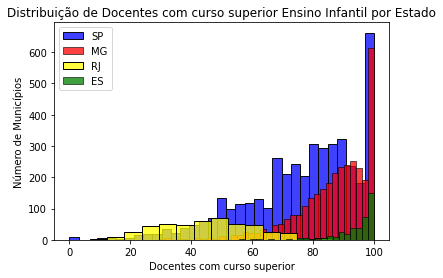

In [ ]:
sns.histplot(ds_t_MG['DSU_INF'],color="blue")
sns.histplot(ds_t_SP['DSU_INF'],color="red")
sns.histplot(ds_t_RJ['DSU_INF'],color="yellow")
sns.histplot(ds_t_ES['DSU_INF'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Docentes com curso superior Ensino Infantil por Estado")
plt.xlabel("Docentes com curso superior")
plt.ylabel("Número de Municípios")
plt.show()

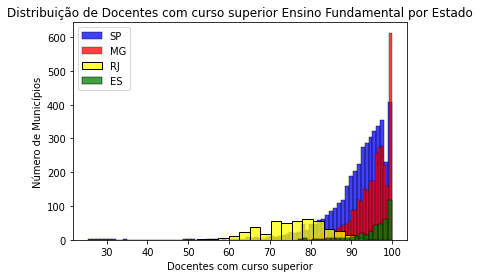

In [ ]:
sns.histplot(ds_t_MG['DSU_FUN'],color="blue")
sns.histplot(ds_t_SP['DSU_FUN'],color="red")
sns.histplot(ds_t_RJ['DSU_FUN'],color="yellow")
sns.histplot(ds_t_ES['DSU_FUN'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Docentes com curso superior Ensino Fundamental por Estado")
plt.xlabel("Docentes com curso superior")
plt.ylabel("Número de Municípios")
plt.show()

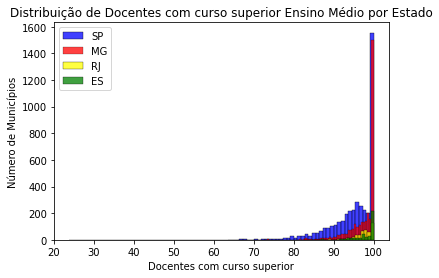

In [ ]:
sns.histplot(ds_t_MG['DSU_MED'],color="blue")
sns.histplot(ds_t_SP['DSU_MED'],color="red")
sns.histplot(ds_t_RJ['DSU_MED'],color="yellow")
sns.histplot(ds_t_ES['DSU_MED'],color="green")
plt.legend(["SP", "MG", "RJ", "ES"])
plt.title("Distribuição de Docentes com curso superior Ensino Médio por Estado")
plt.xlabel("Docentes com curso superior")
plt.ylabel("Número de Municípios")
plt.show()

## Plotando Boxplots para avaliar a variação de horas aula por estado e por ano escolar ao longo dos últimos 5 anos (2016-2020)

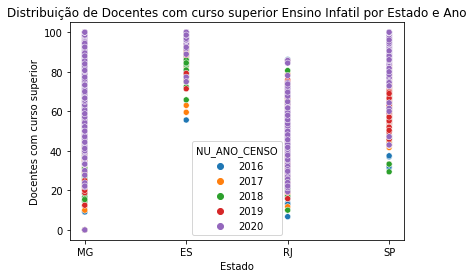

In [ ]:
sns.scatterplot(data = ds_t, x = "SG_UF", y = "DSU_INF", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Docentes com curso superior Ensino Infatil por Estado e Ano")
plt.ylabel("Docentes com curso superior")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

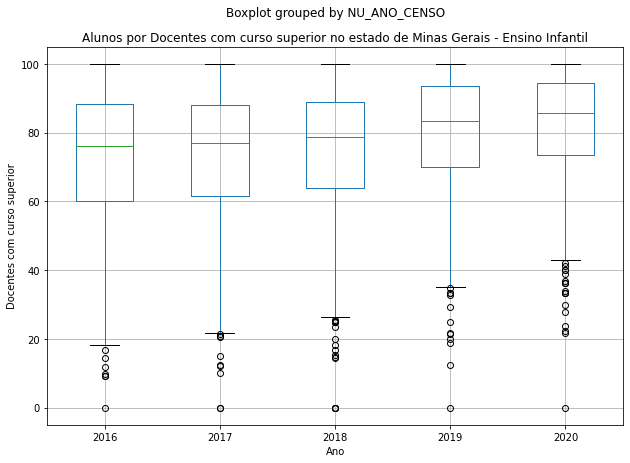

In [ ]:
graph = ds_t_MG.boxplot(column=['DSU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Docentes com curso superior no estado de Minas Gerais - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

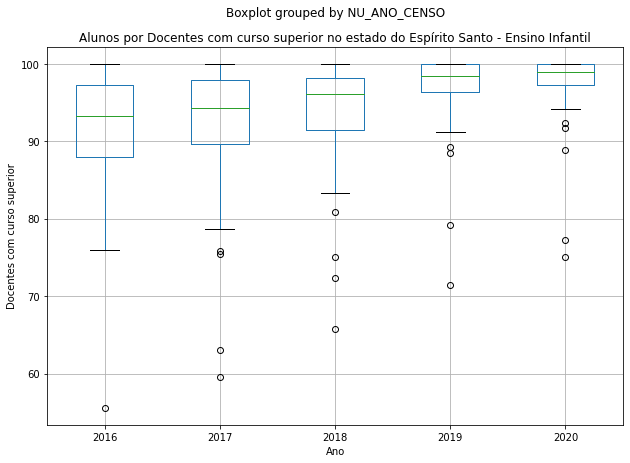

In [ ]:
graph = ds_t_ES.boxplot(column=['DSU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Docentes com curso superior no estado do Espírito Santo - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

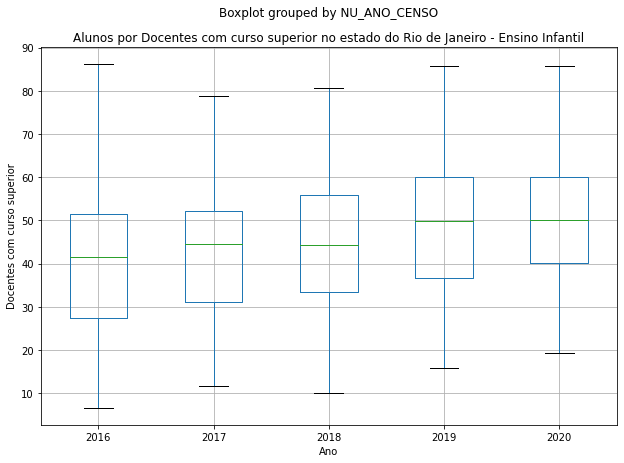

In [ ]:
graph = ds_t_RJ.boxplot(column=['DSU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Docentes com curso superior no estado do Rio de Janeiro - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

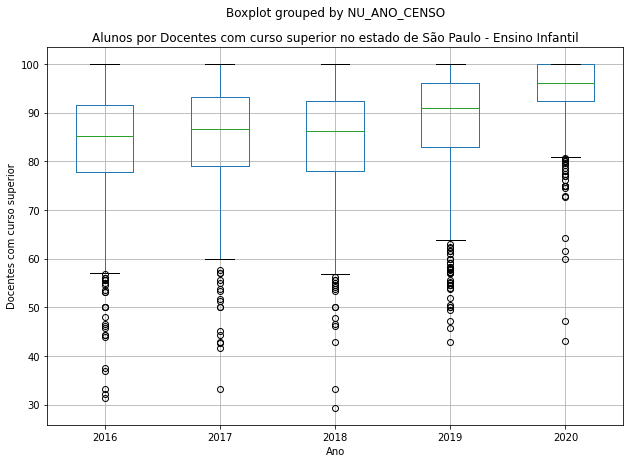

In [ ]:
graph = ds_t_SP.boxplot(column=['DSU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Docentes com curso superior no estado de São Paulo - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

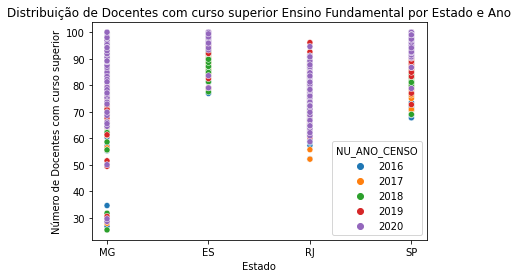

In [ ]:
sns.scatterplot(data = ds_t, x = "SG_UF", y = "DSU_FUN", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Docentes com curso superior Ensino Fundamental por Estado e Ano")
plt.ylabel("Número de Docentes com curso superior")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

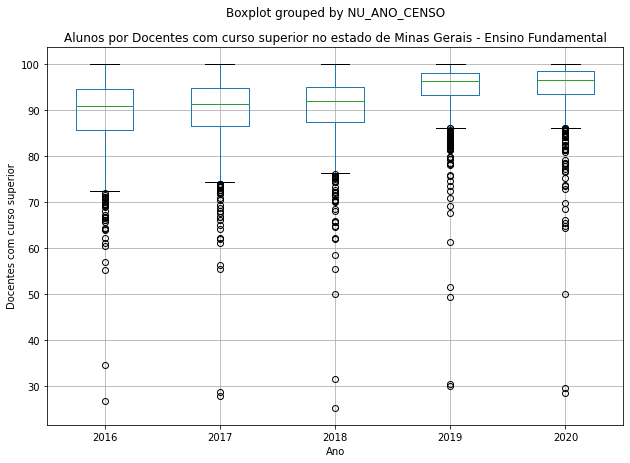

In [ ]:
graph = ds_t_MG.boxplot(column=['DSU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Docentes com curso superior no estado de Minas Gerais - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

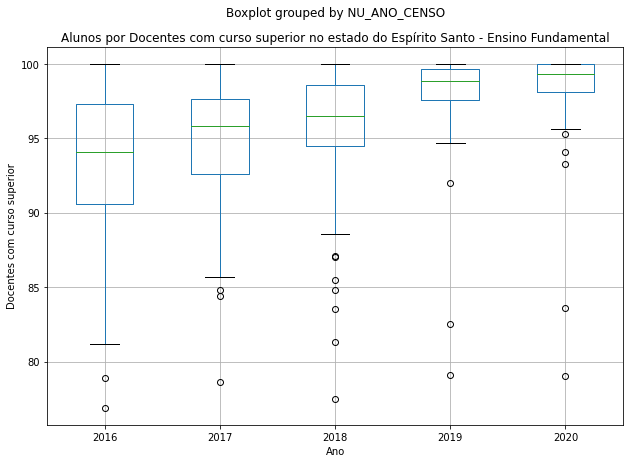

In [ ]:
graph = ds_t_ES.boxplot(column=['DSU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Docentes com curso superior no estado do Espírito Santo - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

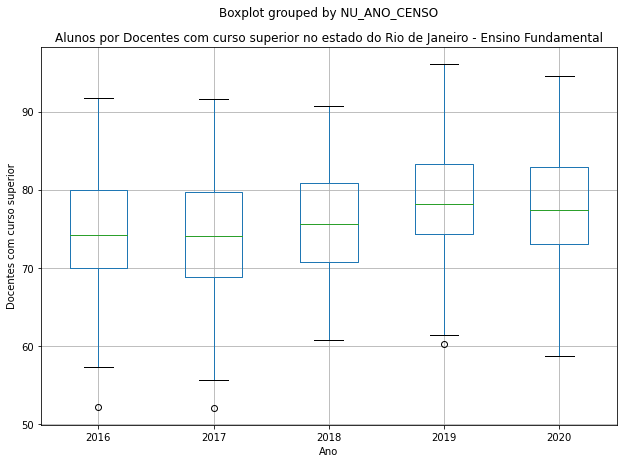

In [ ]:
graph = ds_t_RJ.boxplot(column=['DSU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Docentes com curso superior no estado do Rio de Janeiro - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

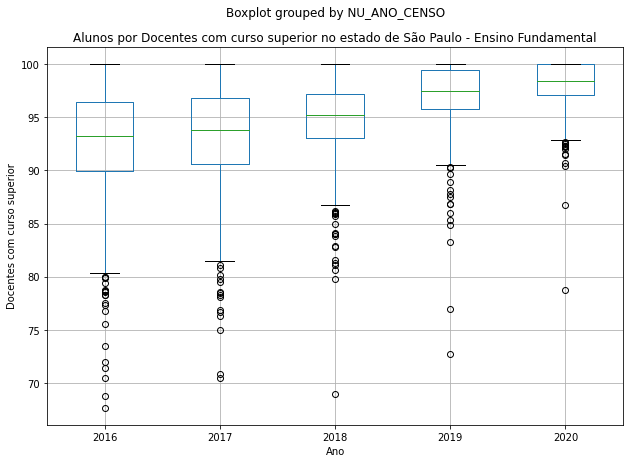

In [ ]:
graph = ds_t_SP.boxplot(column=['DSU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Alunos por Docentes com curso superior no estado de São Paulo - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

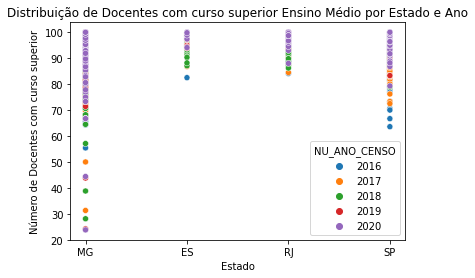

In [ ]:
sns.scatterplot(data = ds_t, x = "SG_UF", y = "DSU_MED", hue='NU_ANO_CENSO', palette=sns.color_palette()[:5])
plt.title("Distribuição de Docentes com curso superior Ensino Médio por Estado e Ano")
plt.ylabel("Número de Docentes com curso superior")
plt.xlabel("Estado")
plt.show()

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

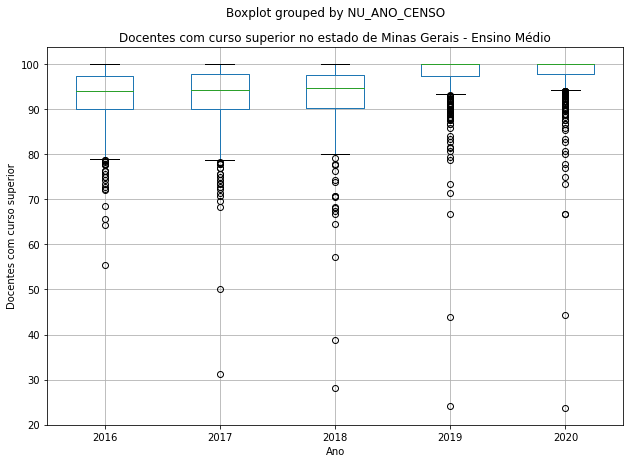

In [ ]:
graph = ds_t_MG.boxplot(column=['DSU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Docentes com curso superior no estado de Minas Gerais - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

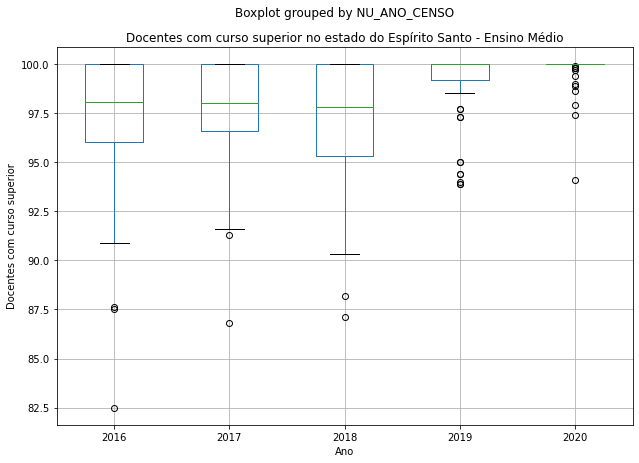

In [ ]:
graph = ds_t_ES.boxplot(column=['DSU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Docentes com curso superior no estado do Espírito Santo - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

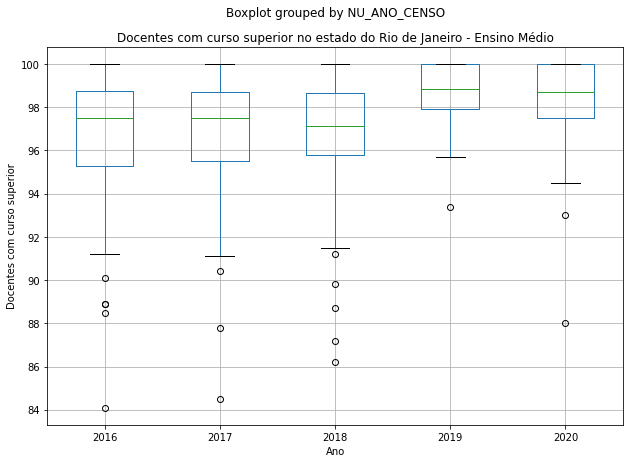

In [ ]:
graph = ds_t_RJ.boxplot(column=['DSU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Docentes com curso superior no estado do Rio de Janeiro - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

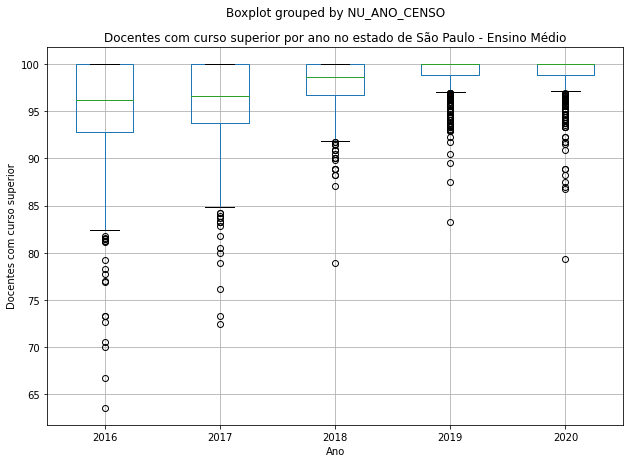

In [ ]:
graph = ds_t_SP.boxplot(column=['DSU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Docentes com curso superior por ano no estado de São Paulo - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com curso superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

## Plotando Boxplots para avaliar variação de horas aula por ano escolar em toda a região sudeste nos últimos 5 anos (2016-2020)

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

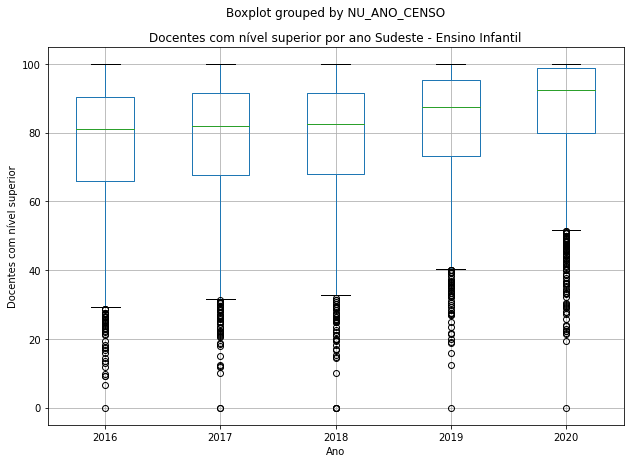

In [ ]:
graph = ds_t.boxplot(column=['DSU_INF'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Docentes com nível superior por ano Sudeste - Ensino Infantil")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com nível superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

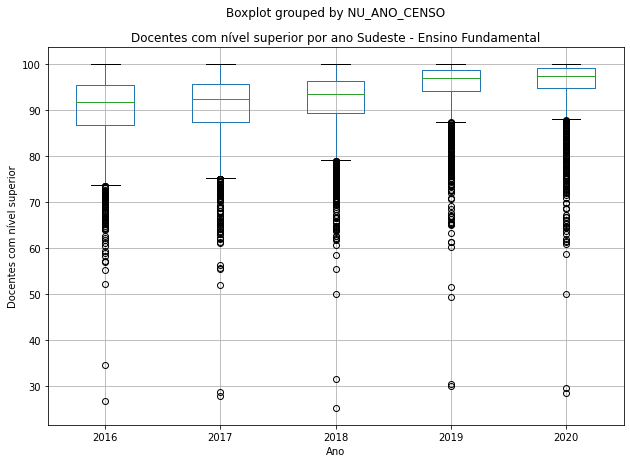

In [ ]:
graph = ds_t.boxplot(column=['DSU_FUN'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Docentes com nível superior por ano Sudeste - Ensino Fundamental")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com nível superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

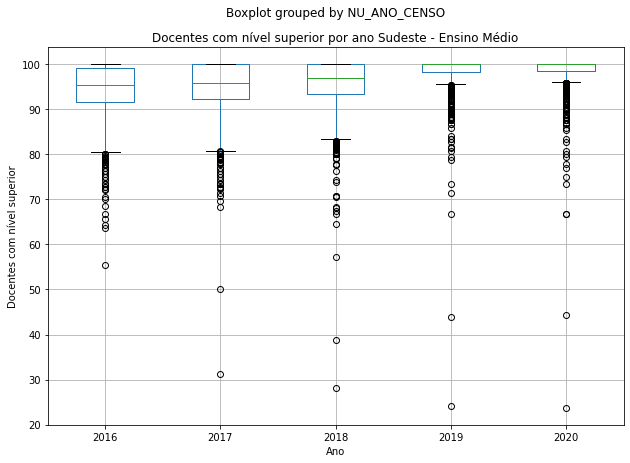

In [ ]:
graph = ds_t.boxplot(column=['DSU_MED'], by=['NU_ANO_CENSO'],figsize=[10,7])
graph.set_title("Docentes com nível superior por ano Sudeste - Ensino Médio")
graph.set_xlabel("Ano")
graph.set_ylabel("Docentes com nível superior")
graph.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])

### **Teste de Hipótese**

<h5>Hipótese Nula H0:</h5> Média Docentes com Ensino Superior(2016-2019) = Média Docentes com Ensino Superior(2020)

<h5>Hipótese Alternativa H1:</h5> Média(2020) > Média(2016-2019) 

<h5>OU SEJA:</h5> A hipótese alternativa fala que Média(2016-2019) - Média(2020) > 0

<h3>TESTE UNILATERAL PELA DIREITA:</h3> 

REGIAO CRITICA: DIFERENÇA > 0 (LADO DIREITO)

VAMOS REJEITAR A HIPOTESE NULA SE A PROBABILIDADE DE ENCONTRAR UMA DIFERENÇA ENTRE AS MÉDIAS,CONFORME OBSERVADO NOS DADOS, SE SITUAR DENTRO DA REGIÃO CRITICA. SE CONSIDERARMOS UM NÍVEL DE SIGNIFICANCIA DE 5%, VAMOS REJEITAR A HIPOTESE NULA SE Z-SCORE > 1.96 OU SE P-VALUE < 0.05.

**Ensino Infantil**

In [162]:
print("2020")
mean_2020,std_error_2020=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_INF'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2019]['DSU_INF'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2018]['DSU_INF'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2017]['DSU_INF'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2016]['DSU_INF'])

2020
Erro padrao 0.410 
Intervalo de confiança: [85.127 - 86.735] 

2019
Erro padrao 0.421 
Intervalo de confiança: [81.451 - 83.099] 

2018
Erro padrao 0.458 
Intervalo de confiança: [76.930 - 78.726] 

2017
Erro padrao 0.465 
Intervalo de confiança: [76.634 - 78.458] 

2016
Erro padrao 0.482 
Intervalo de confiança: [75.363 - 77.254] 


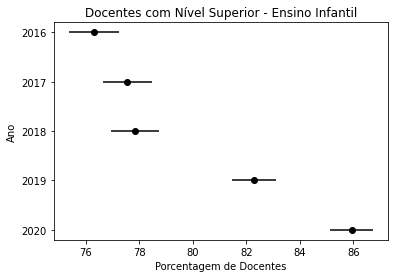

In [163]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Docentes com Nível Superior - Ensino Infantil")
plt.xlabel("Porcentagem de Docentes")
plt.ylabel("Ano")
plt.show()

In [164]:
std_error_diff=str_error_diff_mean(ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_INF'],ds_t[ds_t['NU_ANO_CENSO']!=2020]['DSU_INF'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: 7.441 
Erro Padrão das Diferenças: 0.470 
As diferenças de médias está 15.823 vezes o erro padrão da média 


> **Nesse caso é possível rejeitar H0, pois a diferença das médias é maior que 1.96, logo dizemos que houve alteração significativa no número de docentes com ensino superior entre os anos de 2016 a 2019 e 2020 para o Ensino Infantil.**





In [165]:
analise_amostra(ds_t['DSU_INF'], ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_INF'])

Média População: 79.978
Média Amostra:  85.93081534772163
Erro Padrão:0.4566055473375619
A diferença entre a média da amostra e da população é de 13.038 erros padrões.
Valor-p: 0.0000000000
É improvável que a amostra tenha sido tirada da população







> **Além disso, podemos observar que entre os anos de 2016 e 2020 a mudança no número de Docentes com ensino superior no Ensino Infantil foi muito significativa, apontando para um aumento desse nível de formação entre os Docentes.**



**Ensino Fundamental**

In [166]:
print("2020")
mean_2020,std_error_2020=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_FUN'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2019]['DSU_FUN'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2018]['DSU_FUN'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2017]['DSU_FUN'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2016]['DSU_FUN'])

2020
Erro padrao 0.166 
Intervalo de confiança: [95.054 - 95.707] 

2019
Erro padrao 0.164 
Intervalo de confiança: [94.581 - 95.222] 

2018
Erro padrao 0.186 
Intervalo de confiança: [91.125 - 91.856] 

2017
Erro padrao 0.193 
Intervalo de confiança: [90.085 - 90.840] 

2016
Erro padrao 0.196 
Intervalo de confiança: [89.515 - 90.284] 


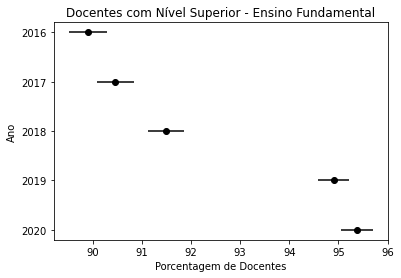

In [167]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Docentes com Nível Superior - Ensino Fundamental")
plt.xlabel("Porcentagem de Docentes")
plt.ylabel("Ano")
plt.show()

In [168]:
std_error_diff=str_error_diff_mean(ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_FUN'],ds_t[ds_t['NU_ANO_CENSO']!=2020]['DSU_FUN'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: 3.692 
Erro Padrão das Diferenças: 0.192 
As diferenças de médias está 19.244 vezes o erro padrão da média 


> **Nesse caso é possível rejeitar H0, pois a diferença das médias é maior que 1.96, logo dizemos que houve alteração significativa no número de docentes com ensino superior entre os anos de 2016 a 2019 e 2020 para o Ensino Fundamental.**





In [169]:
analise_amostra(ds_t['DSU_FUN'], ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_FUN'])

Média População: 92.427
Média Amostra:  95.38057553956827
Erro Padrão:0.18989852415146147
A diferença entre a média da amostra e da população é de 15.555 erros padrões.
Valor-p: 0.0000000000
É improvável que a amostra tenha sido tirada da população







> **Além disso, podemos observar que entre os anos de 2016 e 2020 a mudança no número de Docentes com ensino superior no Ensino Fundamental foi muito significativa, apontando para um aumento do número de Docentes com esse nível de formação.**



**Ensino Médio**

In [170]:
print("2020")
mean_2020,std_error_2020=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_MED'])

print("\n2019")
mean_2019,std_error_2019=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2019]['DSU_MED'])

print("\n2018")
mean_2018,std_error_2018=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2018]['DSU_MED'])

print("\n2017")
mean_2017,std_error_2017=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2017]['DSU_MED'])

print("\n2016")
mean_2016,std_error_2016=confidence_interval(ds_t[ds_t['NU_ANO_CENSO']==2016]['DSU_MED'])

2020
Erro padrao 0.091 
Intervalo de confiança: [98.358 - 98.713] 

2019
Erro padrao 0.089 
Intervalo de confiança: [98.284 - 98.634] 

2018
Erro padrao 0.137 
Intervalo de confiança: [95.152 - 95.688] 

2017
Erro padrao 0.137 
Intervalo de confiança: [94.375 - 94.912] 

2016
Erro padrao 0.142 
Intervalo de confiança: [93.972 - 94.528] 


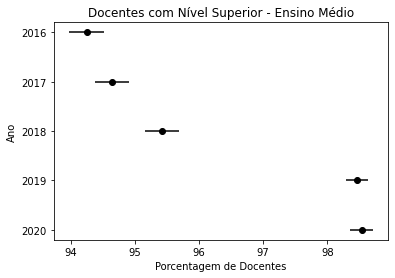

In [171]:
x = [mean_2020, mean_2019, mean_2018, mean_2017, mean_2016]
y = [1, 2, 3, 4, 5]
errors = [std_error_2020, std_error_2019, std_error_2018, std_error_2017, std_error_2016]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((1, 2, 3,4 ,5), ('2020', '2019','2018', '2017', '2016'))
plt.title("Docentes com Nível Superior - Ensino Médio")
plt.xlabel("Porcentagem de Docentes")
plt.ylabel("Ano")
plt.show()

In [174]:
std_error_diff=str_error_diff_mean(ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_MED'],ds_t[ds_t['NU_ANO_CENSO']!=2020]['DSU_MED'])
print("As diferenças de médias está %.3f vezes o erro padrão da média " % (std_error_diff))

Diferenças: 2.842 
Erro Padrão das Diferenças: 0.113 
As diferenças de médias está 25.215 vezes o erro padrão da média 


> **Nesse caso é possível rejeitar H0, pois a diferença das médias é maior que 1.96, logo dizemos que houve alteração significativa no número de docentes com ensino superior entre os anos de 2016 a 2019 e 2020 para o Ensino Médio.**





In [175]:
analise_amostra(ds_t['DSU_MED'], ds_t[ds_t['NU_ANO_CENSO']==2020]['DSU_MED'])

Média População: 96.262
Média Amostra:  98.53563287342526
Erro Padrão:0.1297258402766515
A diferença entre a média da amostra e da população é de 17.529 erros padrões.
Valor-p: 0.0000000000
É improvável que a amostra tenha sido tirada da população







> **Podemos observar que entre os anos de 2016 e 2020 a mudança no número de Docentes com ensino superior no Ensino Fundamental foi muito significativa, apontando para um aumento do número de Docentes com esse nível de formação nesse período.**

